In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import display, HTML
from IPython.core.display import display, HTML
warnings.filterwarnings("ignore")

### Data Loading

In [2]:
# Read the CSV files into DataFrames
rossmann_store = pd.read_csv('Rossmann_store.csv')
rossmann_train = pd.read_csv('Rossmann_train.csv', dtype={'StateHoliday': str})

In [444]:
print("\nRossman Store DataFrame:")
rossmann_store.head()


Rossman Store DataFrame:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [445]:
rossmann_store.shape

(1115, 10)

In [446]:
rossmann_store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [447]:
print("\nRossman Train DataFrame:")
rossmann_train.head()


Rossman Train DataFrame:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [448]:
rossmann_train.shape

(1017209, 9)

In [449]:
rossmann_train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

### Data Integration

In [3]:
# Merge "rossmann_train" and "rossmann_store" DataFrames
rossmann = pd.merge(rossmann_train, rossmann_store, on='Store', how='inner')

# Convert Date to datetime format and Create a new column with the name of the day
rossmann['Date'] = pd.to_datetime(rossmann['Date']) 
rossmann['DayOfWeekName'] = rossmann['Date'].dt.day_name()
rossmann.set_index('Date', inplace=True)

In [451]:
print("\nMerged Rossmann DataFrame:")
rossmann.head()


Merged Rossmann DataFrame:


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeekName
Date,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Friday
2015-07-30,1,4,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Thursday
2015-07-29,1,3,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Wednesday
2015-07-28,1,2,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Tuesday
2015-07-27,1,1,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Monday


In [452]:
rossmann.shape

(1017209, 18)

In [453]:
rossmann.dtypes

Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
DayOfWeekName                 object
dtype: object

### Taking top 20% of Sales

In [4]:
# Find top 20 percentile value of sales
_80th_percentile = rossmann['Sales'].quantile(0.80)

'''Filter the dataframe to include only rows where sales are 
    greater or equal to the 80th percentile value''' 
top_20 = (rossmann[rossmann['Sales']>= _80th_percentile])

In [455]:
top_20.shape

(203460, 18)

## Cleaning Missing Values

In [459]:
top_20.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance             300
CompetitionOpenSinceMonth     61991
CompetitionOpenSinceYear      61991
Promo2                            0
Promo2SinceWeek              119659
Promo2SinceYear              119659
PromoInterval                119659
DayOfWeekName                     0
dtype: int64

In [460]:
rossmann.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeekName                     0
dtype: int64

In [461]:
top_20[top_20['CompetitionDistance'].isnull()]['Store'].unique()

array([291, 622, 879])

In [462]:
rossmann[rossmann['CompetitionDistance'].isnull()]['Store'].unique()

array([291, 622, 879])

In [463]:
top_20[top_20['Store']==291].describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,297.0,297.000000,297.000000,297.000000,297.0,297.000000,297.000000,0.0,0.0,0.0,297.0,0.0,0.0
mean,291.0,2.760943,10629.801347,1048.643098,1.0,0.915825,0.191919,NaN,NaN,NaN,0.0,NaN,NaN
std,0.0,1.465858,2117.616503,166.094630,0.0,0.278119,0.394475,NaN,NaN,NaN,0.0,NaN,NaN
min,291.0,1.000000,8464.000000,839.000000,1.0,0.000000,0.000000,NaN,NaN,NaN,0.0,NaN,NaN
25%,291.0,1.000000,8958.000000,920.000000,1.0,1.000000,0.000000,NaN,NaN,NaN,0.0,NaN,NaN
50%,291.0,2.000000,9897.000000,995.000000,1.0,1.000000,0.000000,NaN,NaN,NaN,0.0,NaN,NaN
75%,291.0,4.000000,11921.000000,1155.000000,1.0,1.000000,0.000000,NaN,NaN,NaN,0.0,NaN,NaN
max,291.0,6.000000,21872.000000,1847.000000,1.0,1.000000,1.000000,NaN,NaN,NaN,0.0,NaN,NaN


In [464]:
top_20[top_20['Store']==622].describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,2.0,2.0,2.00000,2.000000,2.0,2.000000,2.000000,0.0,0.0,0.0,2.0,0.0,0.0
mean,622.0,1.0,9009.00000,788.500000,1.0,0.500000,0.500000,NaN,NaN,NaN,0.0,NaN,NaN
std,0.0,0.0,472.34733,187.383297,0.0,0.707107,0.707107,NaN,NaN,NaN,0.0,NaN,NaN
min,622.0,1.0,8675.00000,656.000000,1.0,0.000000,0.000000,NaN,NaN,NaN,0.0,NaN,NaN
25%,622.0,1.0,8842.00000,722.250000,1.0,0.250000,0.250000,NaN,NaN,NaN,0.0,NaN,NaN
50%,622.0,1.0,9009.00000,788.500000,1.0,0.500000,0.500000,NaN,NaN,NaN,0.0,NaN,NaN
75%,622.0,1.0,9176.00000,854.750000,1.0,0.750000,0.750000,NaN,NaN,NaN,0.0,NaN,NaN
max,622.0,1.0,9343.00000,921.000000,1.0,1.000000,1.000000,NaN,NaN,NaN,0.0,NaN,NaN


In [465]:
top_20[top_20['Store']==879].describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
mean,879.0,1.0,8464.0,579.0,1.0,1.0,0.0,NaN,NaN,NaN,1.0,5.0,2013.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,879.0,1.0,8464.0,579.0,1.0,1.0,0.0,NaN,NaN,NaN,1.0,5.0,2013.0
25%,879.0,1.0,8464.0,579.0,1.0,1.0,0.0,NaN,NaN,NaN,1.0,5.0,2013.0
50%,879.0,1.0,8464.0,579.0,1.0,1.0,0.0,NaN,NaN,NaN,1.0,5.0,2013.0
75%,879.0,1.0,8464.0,579.0,1.0,1.0,0.0,NaN,NaN,NaN,1.0,5.0,2013.0
max,879.0,1.0,8464.0,579.0,1.0,1.0,0.0,NaN,NaN,NaN,1.0,5.0,2013.0


In [466]:
rossmann[rossmann['Store']==291].describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,942.0,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,0.0,0.0,0.0,942.0,0.0,0.0
mean,291.0,3.997877,6643.281316,695.831210,0.828025,0.382166,0.182590,NaN,NaN,NaN,0.0,NaN,NaN
std,0.0,1.998404,3862.815448,376.348689,0.377559,0.486175,0.386535,NaN,NaN,NaN,0.0,NaN,NaN
min,291.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.0,NaN,NaN
25%,291.0,2.000000,4673.500000,513.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,0.0,NaN,NaN
50%,291.0,4.000000,7006.000000,789.500000,1.000000,0.000000,0.000000,NaN,NaN,NaN,0.0,NaN,NaN
75%,291.0,6.000000,8867.250000,917.750000,1.000000,1.000000,0.000000,NaN,NaN,NaN,0.0,NaN,NaN
max,291.0,7.000000,21872.000000,1847.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,0.0,NaN,NaN


In [467]:
rossmann[rossmann['Store']==622].describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,942.0,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,0.0,0.0,0.0,942.0,0.0,0.0
mean,622.0,3.997877,3593.717622,357.876858,0.832272,0.382166,0.168790,NaN,NaN,NaN,0.0,NaN,NaN
std,0.0,1.998404,1925.817530,179.989838,0.373823,0.486175,0.374765,NaN,NaN,NaN,0.0,NaN,NaN
min,622.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.0,NaN,NaN
25%,622.0,2.000000,2751.000000,287.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,0.0,NaN,NaN
50%,622.0,4.000000,3969.500000,419.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,0.0,NaN,NaN
75%,622.0,6.000000,4787.750000,469.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,0.0,NaN,NaN
max,622.0,7.000000,9343.000000,921.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,0.0,NaN,NaN


In [468]:
rossmann[rossmann['Store']==879].describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,758.0,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,0.0,0.0,0.0,758.0,758.0,758.0
mean,879.0,4.001319,3087.831135,285.009235,0.820580,0.377309,0.163588,NaN,NaN,NaN,1.0,5.0,2013.0
std,0.0,1.999009,1712.392765,145.515350,0.383957,0.485033,0.370146,NaN,NaN,NaN,0.0,0.0,0.0
min,879.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.0,5.0,2013.0
25%,879.0,2.000000,2574.750000,270.250000,1.000000,0.000000,0.000000,NaN,NaN,NaN,1.0,5.0,2013.0
50%,879.0,4.000000,3326.500000,323.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,1.0,5.0,2013.0
75%,879.0,6.000000,4151.250000,372.750000,1.000000,1.000000,0.000000,NaN,NaN,NaN,1.0,5.0,2013.0
max,879.0,7.000000,8464.000000,661.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.0,5.0,2013.0


In [469]:
top_20['CompetitionDistance'].describe()

count    203160.000000
mean       5199.038393
std        7805.721416
min          20.000000
25%         460.000000
50%        1920.000000
75%        6480.000000
max       75860.000000
Name: CompetitionDistance, dtype: float64

In [470]:
rossmann['CompetitionDistance'].describe().round(3)

count    1014567.000
mean        5430.086
std         7715.324
min           20.000
25%          710.000
50%         2330.000
75%         6890.000
max        75860.000
Name: CompetitionDistance, dtype: float64

### We can see that the three stores with 300 missing values for "CompetitionDistance" also have missing values for "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear". Hence, we can assume that Rossmann did not keep records of competitions that exceeded a distance of 75,860 meters. Since distances over 75,860 meters can be considered as being in a different economic district, they likely don't impact sales from other competitors. As a result, our team chose not to impute values for the competition distance, given its small portion and the inherent complexity of the situation. These Rossmann stores are distributed based on the number and size of cities across various countries. This distribution directly affects sales, and therefore requires careful consideration; it cannot be simply imputed.

In [5]:
top_20_clean = top_20.copy()
rossmann_clean = rossmann.copy()

* Dropping Missing values of 'CompetitionDistance'

In [483]:
top_20_clean.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth     61691
CompetitionOpenSinceYear      61691
Promo2                            0
Promo2SinceWeek              119360
Promo2SinceYear              119360
PromoInterval                119360
DayOfWeekName                     0
dtype: int64

In [484]:
rossmann_clean.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    320706
CompetitionOpenSinceYear     320706
Promo2                            0
Promo2SinceWeek              506147
Promo2SinceYear              506147
PromoInterval                506147
DayOfWeekName                     0
dtype: int64

In [6]:
top_20_clean.dropna(subset ='CompetitionDistance',inplace = True)
rossmann_clean.dropna(subset ='CompetitionDistance',inplace = True)

In [475]:
top_20_clean['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [476]:
rossmann_clean['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

### Rossmann was founded in 1972; however, we have data for "CompetitionOpenSinceYear" that are 1900 and 1961. We might consider these data as outliers due to misentry, but there's also a possibility that other competing stores opened before the Rossmann stores and that Rossmann kept records of these after investigation. Overall, without further information to fully justify dropping these data, we've decided to retain them.

In [477]:
top_20_clean['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [478]:
rossmann_clean['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [479]:
check = top_20_clean[top_20_clean['CompetitionOpenSinceYear'].isnull()]['Store']==top_20_clean[top_20_clean['CompetitionOpenSinceMonth'].isnull()]['Store']
check.describe()

count     61691
unique        1
top        True
freq      61691
Name: Store, dtype: object

In [480]:
check = rossmann_clean[rossmann_clean['CompetitionOpenSinceYear'].isnull()]['Store']==rossmann_clean[rossmann_clean['CompetitionOpenSinceMonth'].isnull()]['Store']
check.describe()

count     320706
unique         1
top         True
freq      320706
Name: Store, dtype: object

#### We can confirm that the missing values for "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" occur simultaneously. Therefore, the most probable reasons for the absence of these two data points are that the competing store existed before the store was established, or there was an omission in data recording. Even though these data sets have some missing columns, they contain meaningful information in other columns, so we've decided to keep them.

In [481]:
top_20_clean.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth     61691
CompetitionOpenSinceYear      61691
Promo2                            0
Promo2SinceWeek              119360
Promo2SinceYear              119360
PromoInterval                119360
DayOfWeekName                     0
dtype: int64

In [486]:
top_20_clean.notnull().sum()

Store                        203160
DayOfWeek                    203160
Sales                        203160
Customers                    203160
Open                         203160
Promo                        203160
StateHoliday                 203160
SchoolHoliday                203160
StoreType                    203160
Assortment                   203160
CompetitionDistance          203160
CompetitionOpenSinceMonth    141469
CompetitionOpenSinceYear     141469
Promo2                       203160
Promo2SinceWeek               83800
Promo2SinceYear               83800
PromoInterval                 83800
DayOfWeekName                203160
dtype: int64

In [487]:
rossmann_clean.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    320706
CompetitionOpenSinceYear     320706
Promo2                            0
Promo2SinceWeek              506147
Promo2SinceYear              506147
PromoInterval                506147
DayOfWeekName                     0
dtype: int64

In [488]:
rossmann_clean.notnull().sum()

Store                        1014567
DayOfWeek                    1014567
Sales                        1014567
Customers                    1014567
Open                         1014567
Promo                        1014567
StateHoliday                 1014567
SchoolHoliday                1014567
StoreType                    1014567
Assortment                   1014567
CompetitionDistance          1014567
CompetitionOpenSinceMonth     693861
CompetitionOpenSinceYear      693861
Promo2                       1014567
Promo2SinceWeek               508420
Promo2SinceYear               508420
PromoInterval                 508420
DayOfWeekName                1014567
dtype: int64

In [7]:
# Define a function to generate a confusion matrix based on given conditions.
def generate_confusion_matrix(promo2_condition, target_condition):
    TP = sum(promo2_condition & target_condition)
    TN = sum(~promo2_condition & ~target_condition)
    FP = sum(~promo2_condition & target_condition)
    FN = sum(promo2_condition & ~target_condition)

    # Create a DataFrame to represent the confusion matrix
    matrix = pd.DataFrame({
        'Promo2 Yes': [TP, FN],
        'Promo2 No': [FP, TN]
    }, index=[f'{target_condition.name} Not Null', f'{target_condition.name} Null'])
    
    return matrix

# Define a function to display multiple DataFrames side by side
def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display(HTML(html_str))

    
# Define Promo2 condition
promo2_yes = top_20_clean['Promo2'] == 1

# Generate confusion matrices for different columns
matrix_year = generate_confusion_matrix(promo2_yes, top_20_clean['Promo2SinceYear'].notnull())
matrix_week = generate_confusion_matrix(promo2_yes, top_20_clean['Promo2SinceWeek'].notnull())
matrix_interval = generate_confusion_matrix(promo2_yes, top_20_clean['PromoInterval'].notnull())

# Display the confusion matrices
display_side_by_side(matrix_year, matrix_week, matrix_interval)

,Promo2 Yes,Promo2 No
Promo2SinceYear Not Null,83800,0
Promo2SinceYear Null,0,119360
,Promo2 Yes,Promo2 No
Promo2SinceWeek Not Null,83800,0
Promo2SinceWeek Null,0,119360
,Promo2 Yes,Promo2 No
PromoInterval Not Null,83800,0
PromoInterval Null,0,119360


In [8]:
# Define a function to generate a confusion matrix based on given conditions.
def generate_confusion_matrix(promo2_condition, target_condition):
    TP = sum(promo2_condition & target_condition)
    TN = sum(~promo2_condition & ~target_condition)
    FP = sum(~promo2_condition & target_condition)
    FN = sum(promo2_condition & ~target_condition)

    # Create a DataFrame to represent the confusion matrix
    matrix = pd.DataFrame({
        'Promo2 Yes': [TP, FN],
        'Promo2 No': [FP, TN]
    }, index=[f'{target_condition.name} Not Null', f'{target_condition.name} Null'])
    
    return matrix

# Define a function to display multiple DataFrames side by side
def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display(HTML(html_str))

    
# Define Promo2 condition
promo2_yes = rossmann_clean['Promo2'] == 1

# Generate confusion matrices for different columns
matrix_year = generate_confusion_matrix(promo2_yes, rossmann_clean['Promo2SinceYear'].notnull())
matrix_week = generate_confusion_matrix(promo2_yes, rossmann_clean['Promo2SinceWeek'].notnull())
matrix_interval = generate_confusion_matrix(promo2_yes, rossmann_clean['PromoInterval'].notnull())

# Display the confusion matrices
display_side_by_side(matrix_year, matrix_week, matrix_interval)

,Promo2 Yes,Promo2 No
Promo2SinceYear Not Null,508420,0
Promo2SinceYear Null,0,506147
,Promo2 Yes,Promo2 No
Promo2SinceWeek Not Null,508420,0
Promo2SinceWeek Null,0,506147
,Promo2 Yes,Promo2 No
PromoInterval Not Null,508420,0
PromoInterval Null,0,506147


### The presence of missing values occurs when promotion 2 is not happening. Thus, having these missing values is not an issue.

In [491]:
top_20_clean.describe().round(3)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,203160.000,203160.000,203160.000,203160.000,203160.0,203160.000,203160.000,203160.000,141469.000,141469.000,203160.000,83800.000,83800.000
mean,565.191,3.067,11210.718,1200.116,1.0,0.712,0.215,5199.038,7.030,2008.674,0.412,25.059,2011.684
std,313.504,1.752,2909.469,526.850,0.0,0.453,0.411,7805.721,3.147,6.942,0.492,14.123,1.772
min,1.000,1.000,8461.000,216.000,1.0,0.000,0.000,20.000,1.000,1900.000,0.000,1.000,2009.000
25%,316.000,1.000,9227.000,870.000,1.0,0.000,0.000,460.000,4.000,2006.000,0.000,13.000,2010.000
50%,546.000,3.000,10288.000,1066.000,1.0,1.000,0.000,1920.000,7.000,2010.000,0.000,22.000,2011.000
75%,826.000,5.000,12137.000,1336.000,1.0,1.000,0.000,6480.000,10.000,2013.000,1.000,40.000,2013.000
max,1115.000,7.000,41551.000,7388.000,1.0,1.000,1.000,75860.000,12.000,2015.000,1.000,50.000,2015.000


In [492]:
rossmann_clean.describe().round(3)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1014567.00,1014567.000,1014567.000,1014567.000,1014567.000,1014567.000,1014567.000,1014567.000,693861.000,693861.000,1014567.000,508420.000,508420.000
mean,558.38,3.998,5777.043,633.603,0.830,0.382,0.179,5430.086,7.223,2008.690,0.501,23.296,2011.751
std,322.10,1.997,3851.045,464.648,0.376,0.486,0.383,7715.324,3.212,5.993,0.500,14.089,1.663
min,1.00,1.000,0.000,0.000,0.000,0.000,0.000,20.000,1.000,1900.000,0.000,1.000,2009.000
25%,280.00,2.000,3732.000,405.000,1.000,0.000,0.000,710.000,4.000,2006.000,0.000,13.000,2011.000
50%,558.00,4.000,5748.000,610.000,1.000,0.000,0.000,2330.000,8.000,2010.000,1.000,22.000,2012.000
75%,837.00,6.000,7859.000,837.000,1.000,1.000,0.000,6890.000,10.000,2013.000,1.000,37.000,2013.000
max,1115.00,7.000,41551.000,7388.000,1.000,1.000,1.000,75860.000,12.000,2015.000,1.000,50.000,2015.000


# Exploratory Data Analysis

## Sales

In [510]:
rossmann['Sales'].describe().round(2)

count    1017209.00
mean        5773.82
std         3849.93
min            0.00
25%         3727.00
50%         5744.00
75%         7856.00
max        41551.00
Name: Sales, dtype: float64

In [504]:
top_20['Sales'].describe().round(2)

count    203460.00
mean      11209.83
std        2908.54
min        8461.00
25%        9226.00
50%       10287.00
75%       12136.00
max       41551.00
Name: Sales, dtype: float64

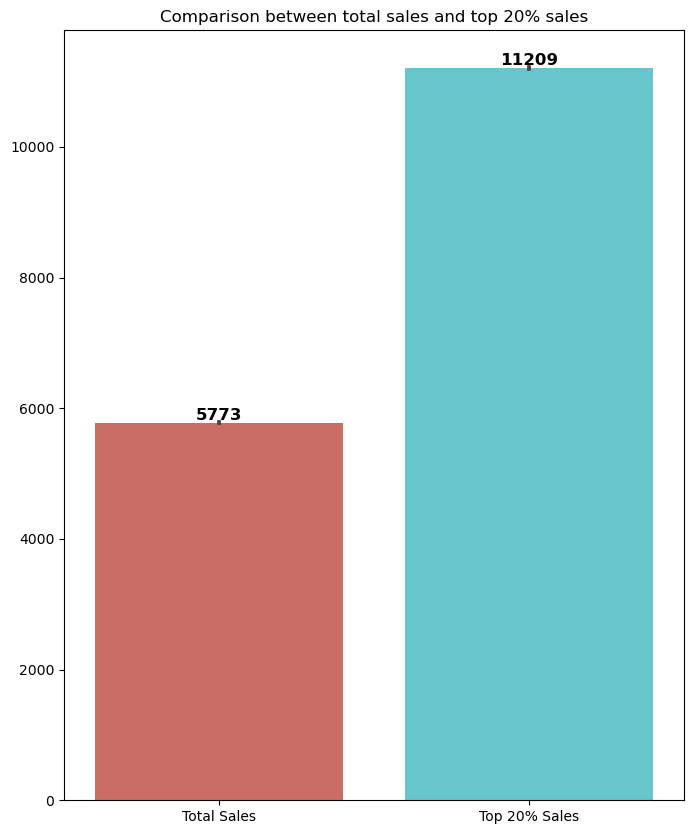

In [509]:
colors = sns.color_palette('hls', 2)

# Box plots to compare between total sales and top 20% sales
plt.figure(figsize=(8,10))
ax = sns.barplot(data=[rossmann['Sales'], top_20['Sales']], palette=colors)

# Display figures on top of the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom',weight='bold')

# Setting labels
plt.xticks([0, 1], ['Total Sales', 'Top 20% Sales'])
plt.title('Comparison between total sales and top 20% sales')
plt.show()

## Heatmap

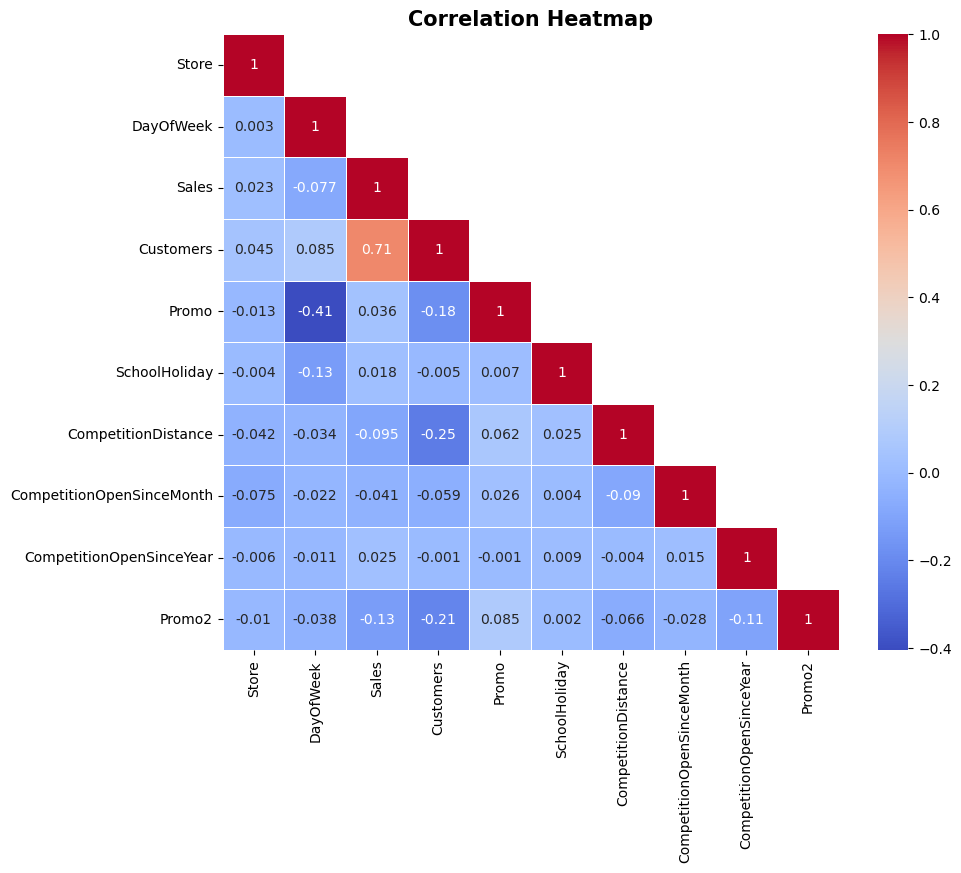

In [495]:
# Exclude some columns 
top_20_subset = top_20_clean.drop(['Promo2SinceYear','Promo2SinceWeek','Open'], axis=1)
# Calculate the correlation table
corr = top_20_subset.corr().round(3) 
# Create a mask to exclude the diagonal
mask = np.triu(np.ones_like(corr, dtype=bool), k=1) 
plt.figure(figsize=(10,8))
sns.heatmap(data=corr, annot=True, mask=mask, linewidths=0.5, square=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontweight='bold', fontsize=15)

plt.show()

## Regression Plot

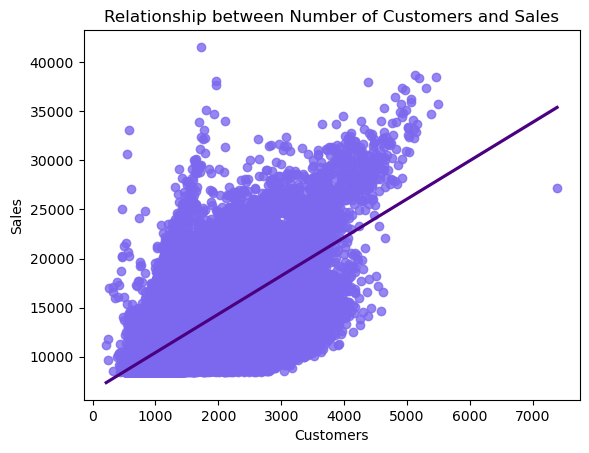

In [49]:
sns.regplot(x=top_20_clean['Customers'], y=top_20_clean['Sales'],color='mediumslateblue', line_kws={'color': 'indigo'})
plt.title('Relationship between Number of Customers and Sales');

## Assortment

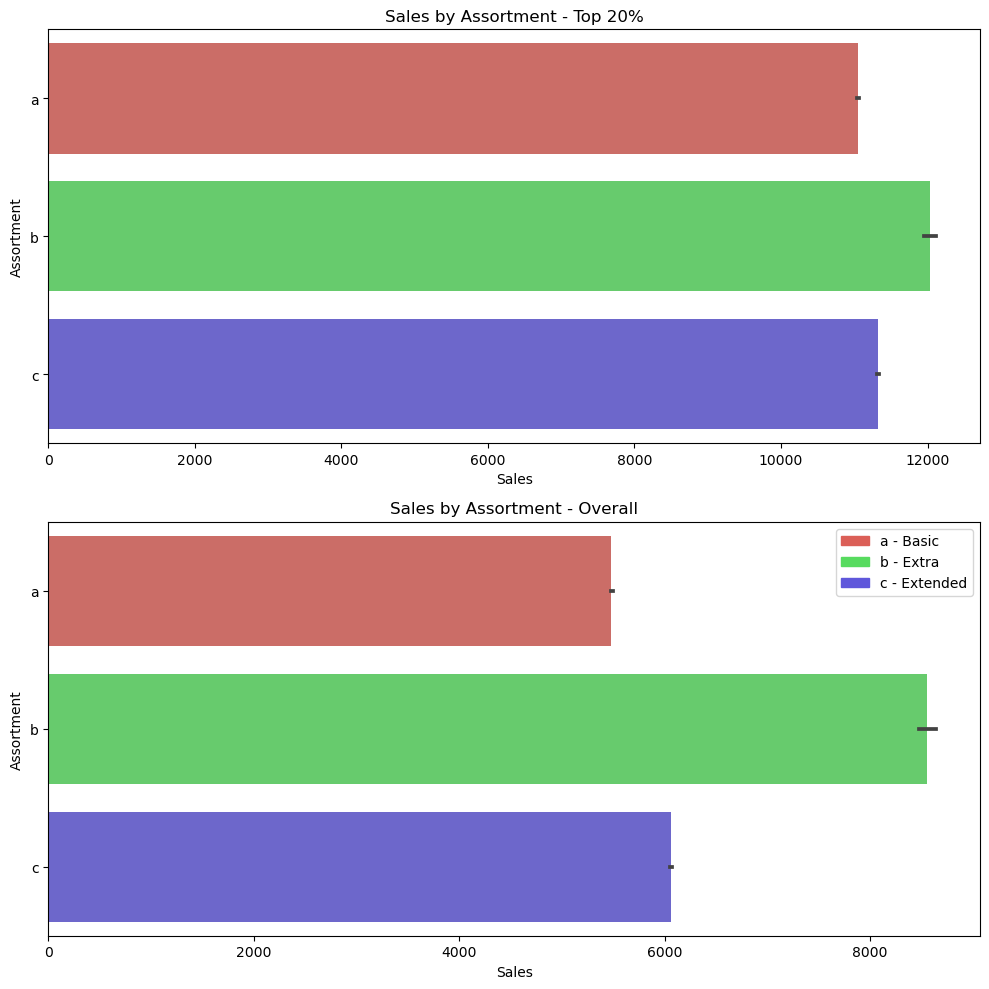

In [50]:
# Order for the assortments
order_assortment = ['a', 'b', 'c']

colors = sns.color_palette('hls', 3)

plt.figure(figsize=(10, 10))


plt.subplot(2, 1, 1)
sns.barplot(data=top_20_clean, x='Sales', y='Assortment', palette=colors, order=order_assortment)
plt.xlabel('Sales')
plt.ylabel('Assortment')
plt.title('Sales by Assortment - Top 20%')


plt.subplot(2, 1, 2)
sns.barplot(data=rossmann_clean, x='Sales', y='Assortment', palette=colors, order=order_assortment)
plt.xlabel('Sales')
plt.ylabel('Assortment')
plt.title('Sales by Assortment - Overall')

# Add legend to the figure
legend_patches = [mpatches.Patch(color=colors[i], label=label) for i, label in enumerate(['a - Basic', 'b - Extra', 'c - Extended'])]
plt.legend(handles=legend_patches, loc='upper right')
plt.tight_layout()

## Store Type

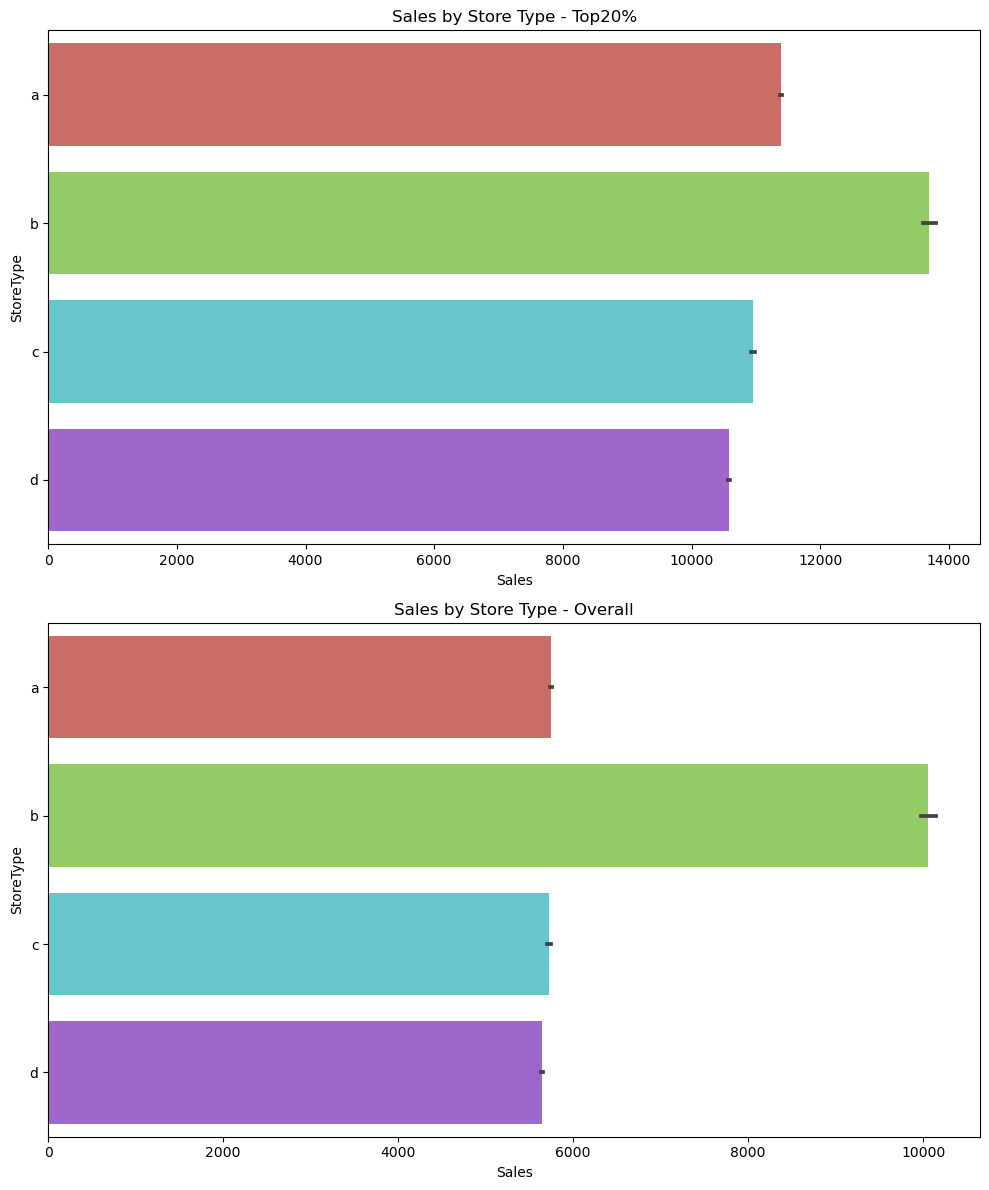

In [52]:
# Order for the assortments
order_storetype = ['a', 'b', 'c', 'd']

colors = sns.color_palette('hls', 4)

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
sns.barplot(data=top_20_clean, x='Sales',y='StoreType', palette=colors, order=order_storetype)
plt.xlabel('Sales')
plt.ylabel('StoreType')
plt.title('Sales by Store Type - Top20%')


plt.subplot(2, 1, 2)
sns.barplot(data=rossmann_clean,x='Sales', y='StoreType', palette=colors, order=order_storetype)
plt.xlabel('Sales')
plt.ylabel('StoreType')
plt.title('Sales by Store Type - Overall')

plt.tight_layout()

## Promotions

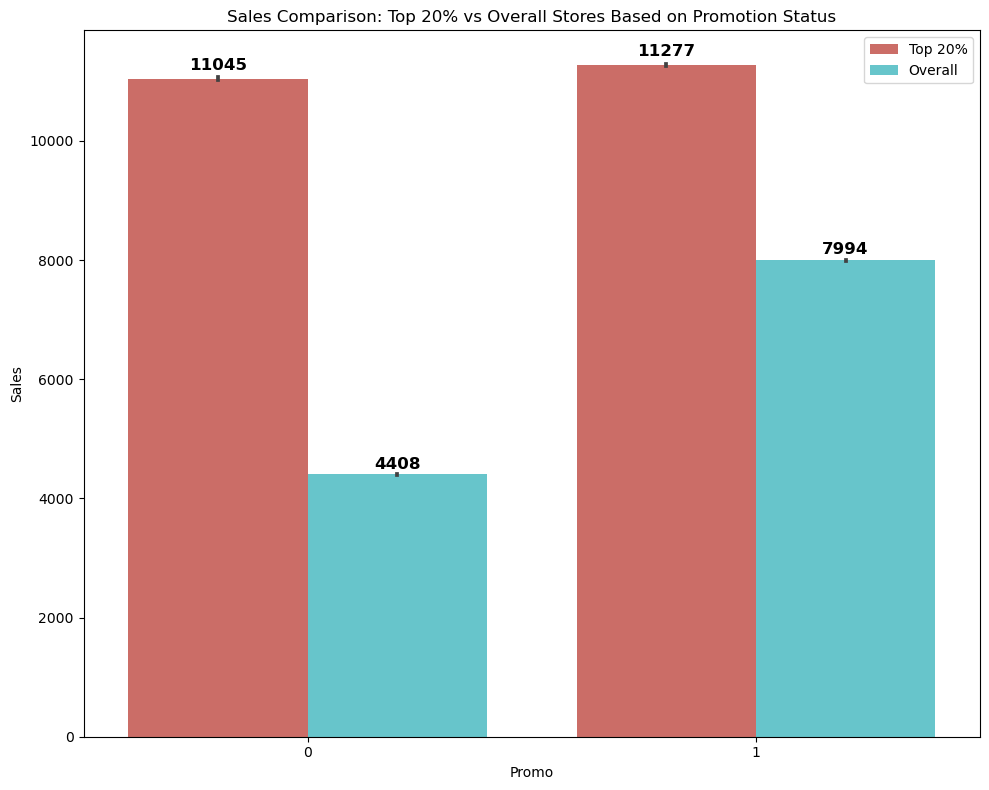

In [54]:
# Add a 'source' column to each dataframe
rossmann_clean['source'] = 'Overall'
top_20_clean['source'] = 'Top 20%'

# Concatenate the dataframes
combined_data = pd.concat([top_20_clean,rossmann_clean])

colors = sns.color_palette('hls', 2)

plt.figure(figsize=(10, 8))

ax = sns.barplot(data=combined_data, x='Promo', y='Sales', hue='source', palette=colors)

plt.xlabel('Promo')
plt.ylabel('Sales')
plt.title('Sales Comparison: Top 20% vs Overall Stores Based on Promotion Status')

# Display figures on top of the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height()*1.008, '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom',weight='bold')

plt.legend()

plt.tight_layout()
plt.show()

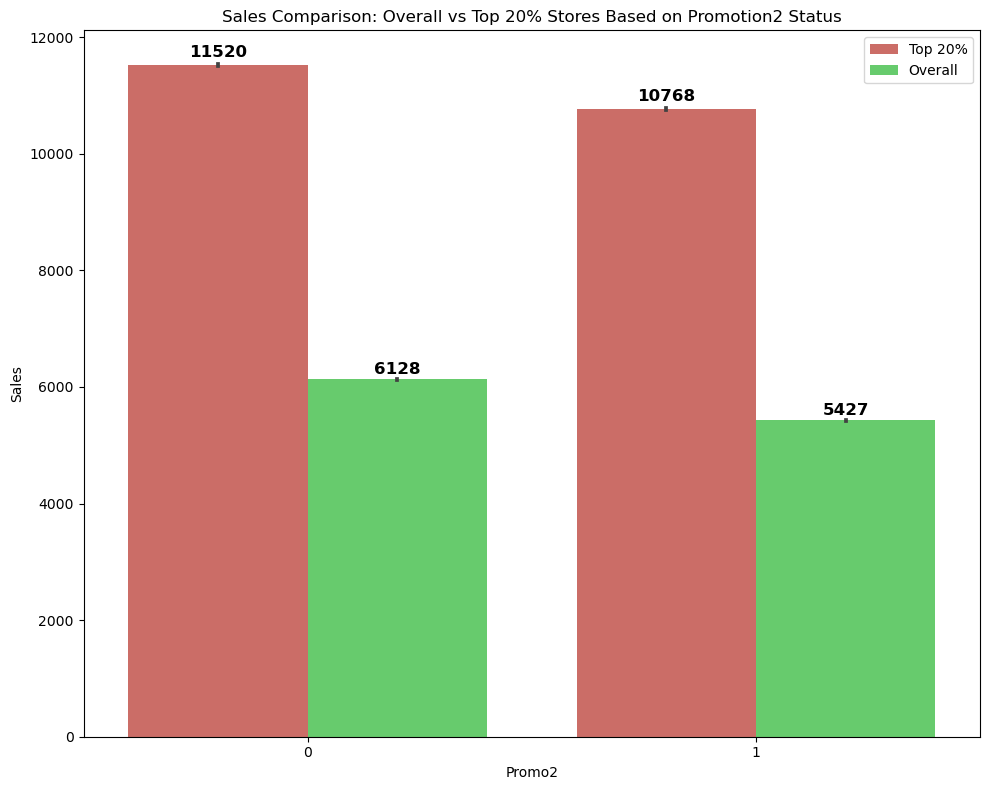

In [55]:
# Add a 'source' column to each dataframe
rossmann_clean['source'] = 'Overall'
top_20_clean['source'] = 'Top 20%'

# Concatenate the dataframes
combined_data = pd.concat([top_20_clean,rossmann_clean])

colors = sns.color_palette('hls', 3)

plt.figure(figsize=(10, 8))

ax = sns.barplot(data=combined_data, x='Promo2', y='Sales', hue='source', palette=colors)

plt.xlabel('Promo2')
plt.ylabel('Sales')
plt.title('Sales Comparison: Overall vs Top 20% Stores Based on Promotion2 Status')

# Display figures on top of the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height()*1.008, '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom',weight='bold')

plt.legend()

plt.tight_layout()
plt.show()

In [56]:
top_20_promo2 = top_20_clean[top_20_clean['Promo2']==1]
top_20_no_promo2 = top_20_clean[top_20_clean['Promo2']==0]

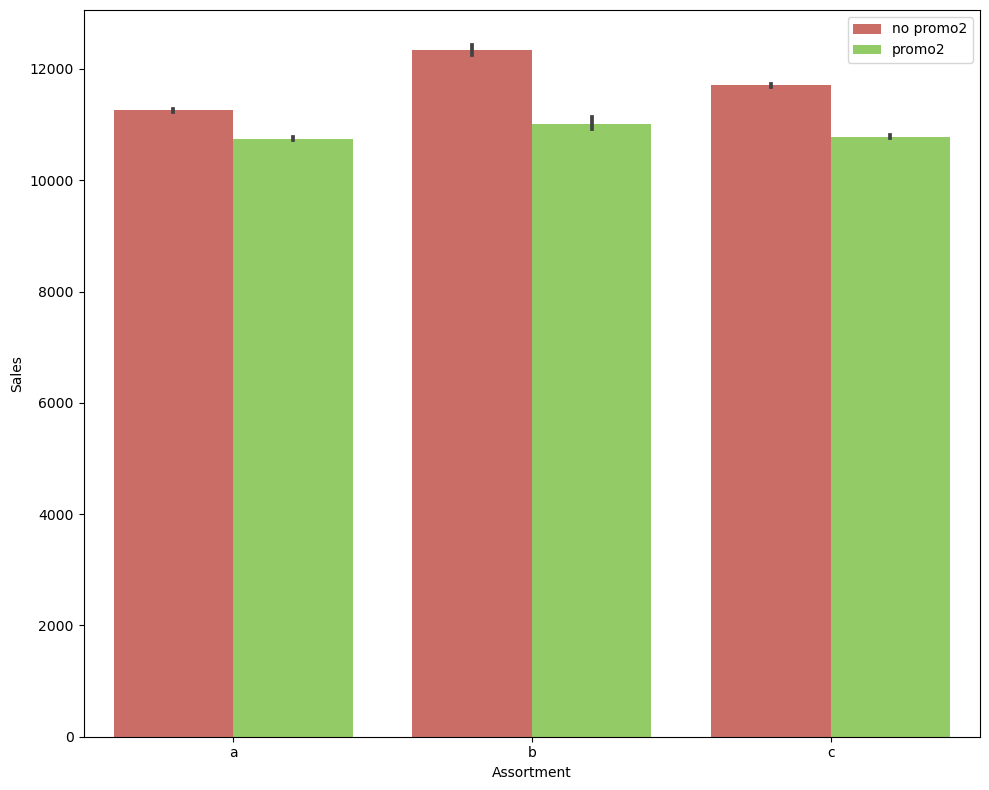

In [57]:
# Add a 'source' column to each dataframe
top_20_promo2['source'] = 'promo2'
top_20_no_promo2['source'] = 'no promo2'

# Order for the assortments
order_assortment = ['a', 'b', 'c']

# Concatenate the dataframes
combined_data = pd.concat([top_20_no_promo2,top_20_promo2])

colors = sns.color_palette('hls', 4)

plt.figure(figsize=(10, 8))

ax = sns.barplot(data=combined_data, x='Assortment', y='Sales', order=order_assortment,hue='source', palette=colors)

plt.xlabel('Assortment')
plt.ylabel('Sales')


plt.legend()

plt.tight_layout()
plt.show()

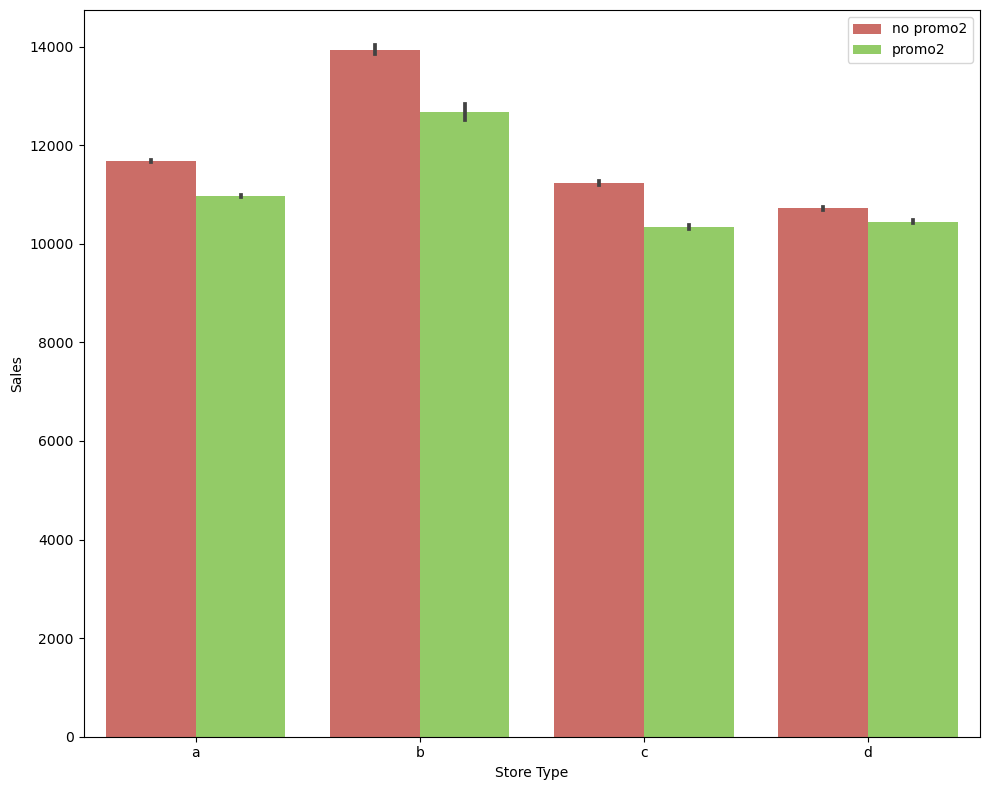

In [58]:
# Add a 'source' column to each dataframe
top_20_promo2['source'] = 'promo2'
top_20_no_promo2['source'] = 'no promo2'

# Order for the assortments
order_storetype = ['a', 'b', 'c', 'd']

# Concatenate the dataframes
combined_data = pd.concat([top_20_no_promo2,top_20_promo2])


colors = sns.color_palette('hls', 4)

plt.figure(figsize=(10, 8))

ax = sns.barplot(data=combined_data, x='StoreType', y='Sales', order=order_storetype,hue='source', palette=colors)

plt.xlabel('Store Type')
plt.ylabel('Sales')

plt.legend()

plt.tight_layout()
plt.show()

## Holidays

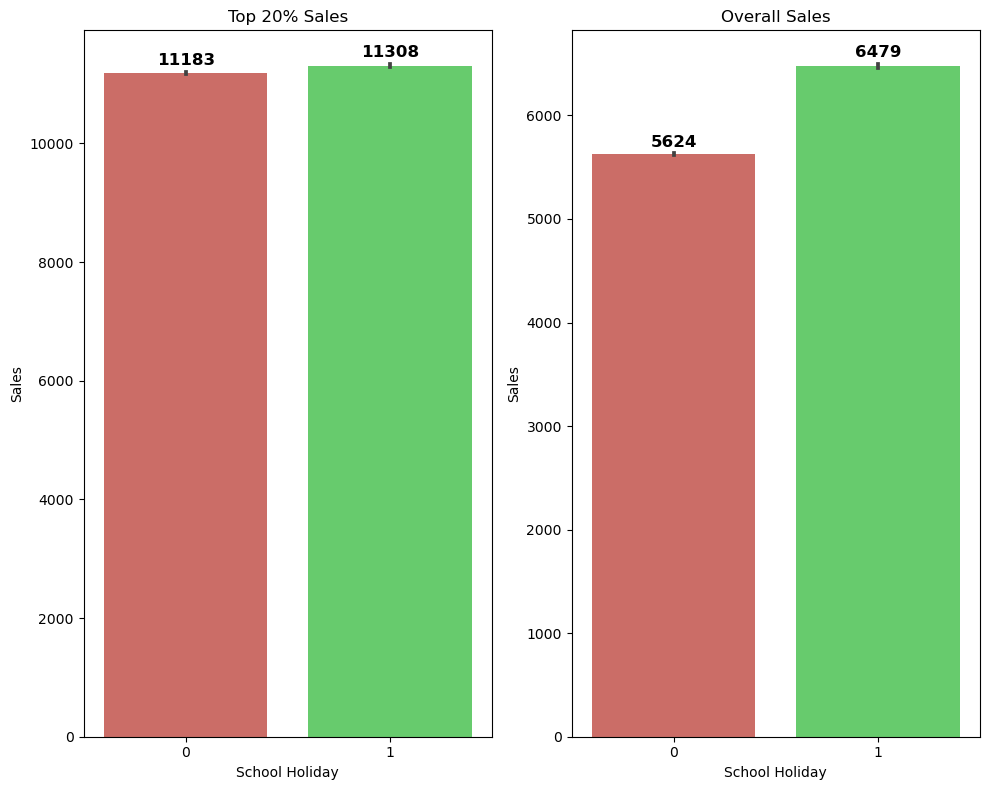

In [59]:
colors = sns.color_palette('hls', 3)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
ax1=sns.barplot(data=top_20_clean, x='SchoolHoliday',y='Sales', palette=colors)
plt.xlabel('School Holiday')
plt.ylabel('Sales')
plt.title('Top 20% Sales')

# Display figures on top of the bars
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width() / 2., p.get_height()*1.008, '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom',weight='bold')


plt.subplot(1, 2, 2)
ax2=sns.barplot(data=rossmann_clean, x='SchoolHoliday',y='Sales', palette=colors)
plt.xlabel('School Holiday')
plt.ylabel('Sales')
plt.title('Overall Sales')

# Display figures on top of the bars
for p in ax2.patches:
    ax2.text(p.get_x() + p.get_width() / 2., p.get_height()*1.008, '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom',weight='bold')
    
plt.tight_layout()

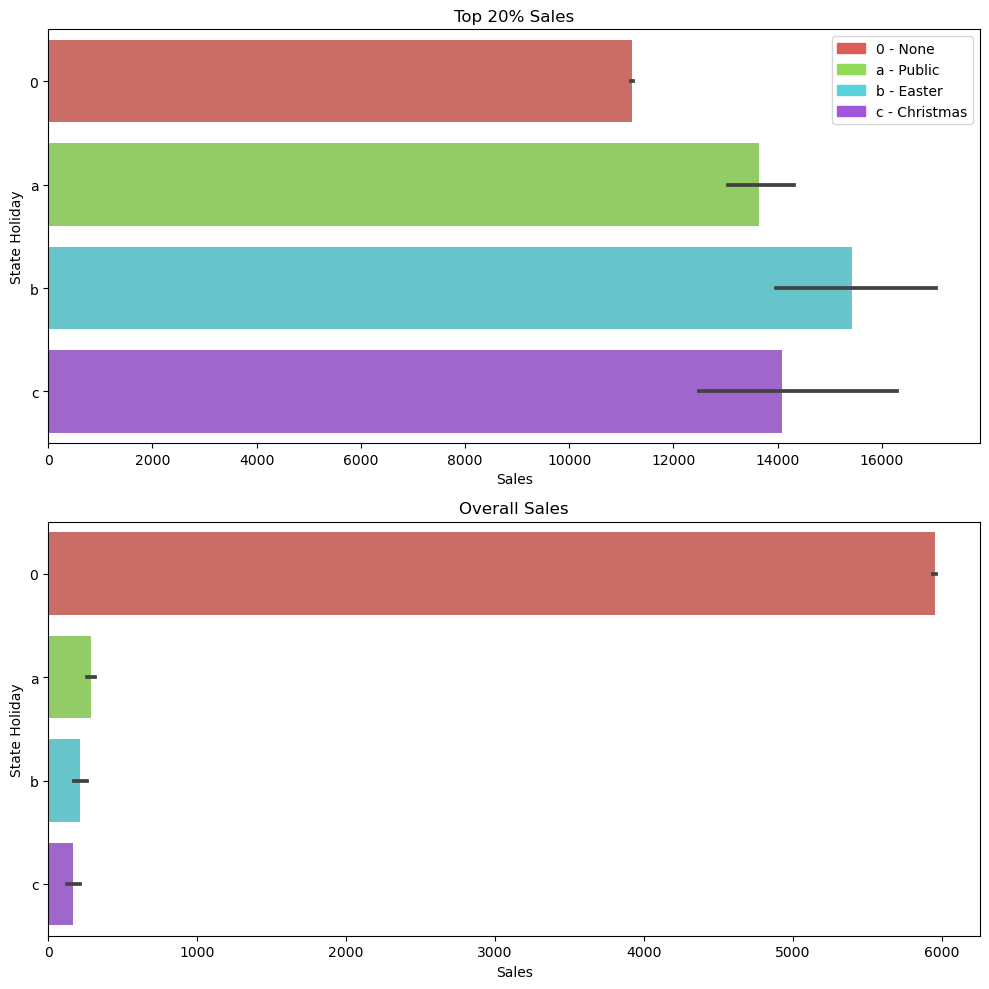

In [60]:
colors = sns.color_palette('hls', 4)

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.barplot(data=top_20_clean, x='Sales',y='StateHoliday', palette=colors)
plt.xlabel('Sales')
plt.ylabel('State Holiday')
plt.title('Top 20% Sales')

legend_patches = [mpatches.Patch(color=colors[i], label=label) for i, label in enumerate(['0 - None', 'a - Public','b - Easter','c - Christmas'])]
plt.legend(handles=legend_patches, loc='upper right')

plt.subplot(2, 1, 2)
sns.barplot(data=rossmann_clean, x='Sales', y='StateHoliday', palette=colors)
plt.xlabel('Sales')
plt.ylabel('State Holiday')
plt.title('Overall Sales')

plt.tight_layout()

In [62]:
top_20_clean['CompetitionDistance'].describe()

count    203160.000000
mean       5199.038393
std        7805.721416
min          20.000000
25%         460.000000
50%        1920.000000
75%        6480.000000
max       75860.000000
Name: CompetitionDistance, dtype: float64

In [63]:
rossmann_clean['CompetitionDistance'].describe().round(3)

count    1014567.000
mean        5430.086
std         7715.324
min           20.000
25%          710.000
50%         2330.000
75%         6890.000
max        75860.000
Name: CompetitionDistance, dtype: float64

In [64]:
top_20_dist = top_20_clean.copy()

bins = [0, 4000, 6000, top_20_clean['CompetitionDistance'].max()]

# Define the labels for each section
labels = ['Near', 'Moderate', 'Far']

# Categorize the 'median_income' column into sections based on custom ranges
top_20_dist['distance_category'] = pd.cut(top_20_clean['CompetitionDistance'], bins=bins, labels=labels)

In [498]:
rossmann_dist = rossmann_clean.copy()

bins = [0, 4000, 6000, rossmann_clean['CompetitionDistance'].max()]

# Define the labels for each section
labels = ['Near', 'Moderate', 'Far']

# Categorize the 'median_income' column into sections based on custom ranges
rossmann_dist['distance_category'] = pd.cut(rossmann_clean['CompetitionDistance'], bins=bins, labels=labels)

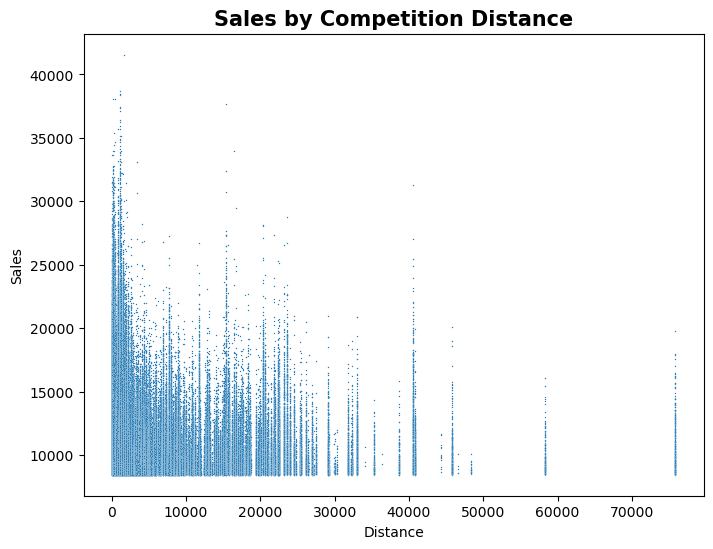

In [503]:
plt.figure(figsize=(8,6))

ax = sns.scatterplot(data=top_20_dist, x='CompetitionDistance', y='Sales', palette='hls',s=1)
plt.xlabel('Distance')
plt.ylabel('Sales')
plt.title('Sales by Competition Distance', fontweight='bold', fontsize=15);

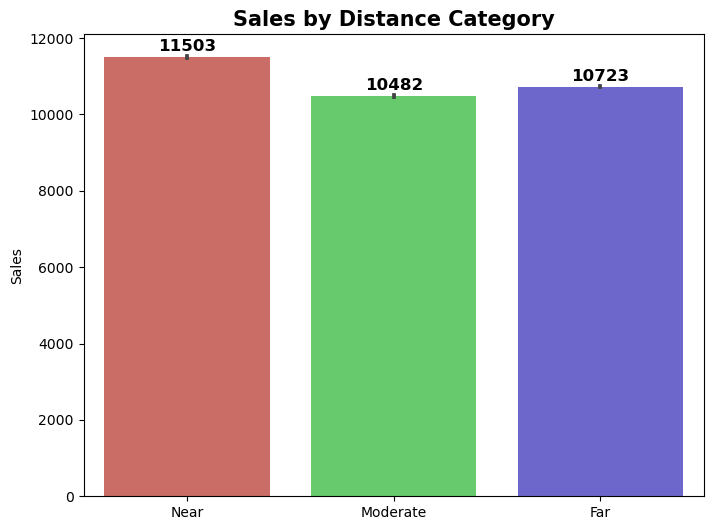

In [497]:
plt.figure(figsize=(8,6))

ax = sns.barplot(data=top_20_dist, x='distance_category', y='Sales', palette='hls')
plt.xlabel('')
plt.ylabel('Sales')
plt.title('Sales by Distance Category', fontweight='bold', fontsize=15);

# Display figures on top of the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height()*1.008, '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom',weight='bold')

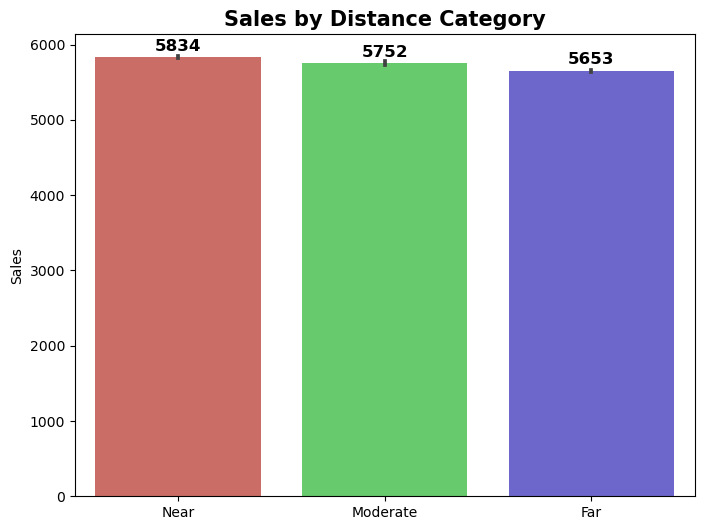

In [67]:
plt.figure(figsize=(8,6))

ax = sns.barplot(data=rossmann_dist, x='distance_category', y='Sales', palette='hls')
plt.xlabel('')
plt.ylabel('Sales')
plt.title('Sales by Distance Category', fontweight='bold', fontsize=15);

# Display figures on top of the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height()*1.008, '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom',weight='bold')

# Exploratory Data Analysis with Time

In [68]:
start_date_20 = top_20_clean.index.min()
end_date_20 = top_20_clean.index.max()

start_date_overall = rossmann_clean.index.min()
end_date_overall = rossmann_clean.index.max()

print("Start date for Top 20% Sales:", start_date_20)
print("End date for Top 20% Sales:", end_date_20)

print("\n")

print("Start date for Overall Sales:", start_date_overall)
print("End date for Overall Sales:", end_date_overall)

Start date for Top 20% Sales: 2013-01-01 00:00:00
End date for Top 20% Sales: 2015-07-31 00:00:00


Start date for Overall Sales: 2013-01-01 00:00:00
End date for Overall Sales: 2015-07-31 00:00:00


## Yearly Sales and Customers

In [69]:
top_20_clean.sort_index(inplace=True)
top_20_years = top_20_clean.resample("1Y").mean()

rossmann_clean.sort_index(inplace=True)
rossmann_years = rossmann_clean.resample("1Y").mean()

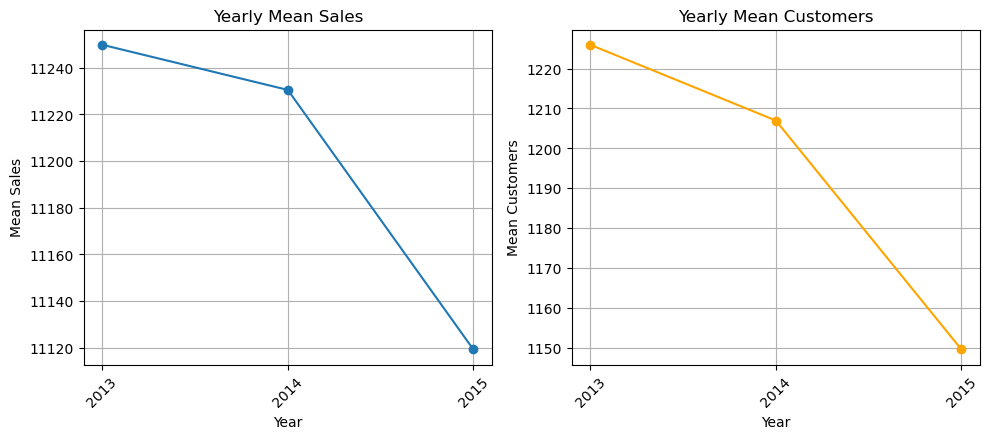

In [70]:
years = [str(year) for year in top_20_years.index.year.unique()] # Extract years

# Create a line graph for the quarter means
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
plt.plot(top_20_years['Sales'], marker='o')
plt.title('Yearly Mean Sales')
plt.xlabel('Year')
plt.ylabel('Mean Sales')
plt.xticks(ticks=top_20_years.index, labels=years, rotation=45) # Set x-ticks as years
plt.tight_layout()
plt.grid()

plt.subplot(2,2,2)
plt.plot(top_20_years['Customers'], marker='o', color='orange')
plt.title('Yearly Mean Customers')
plt.xlabel('Year')
plt.ylabel('Mean Customers')
plt.xticks(ticks=top_20_years.index, labels=years, rotation=45) # Set x-ticks as years
plt.tight_layout()
plt.grid()

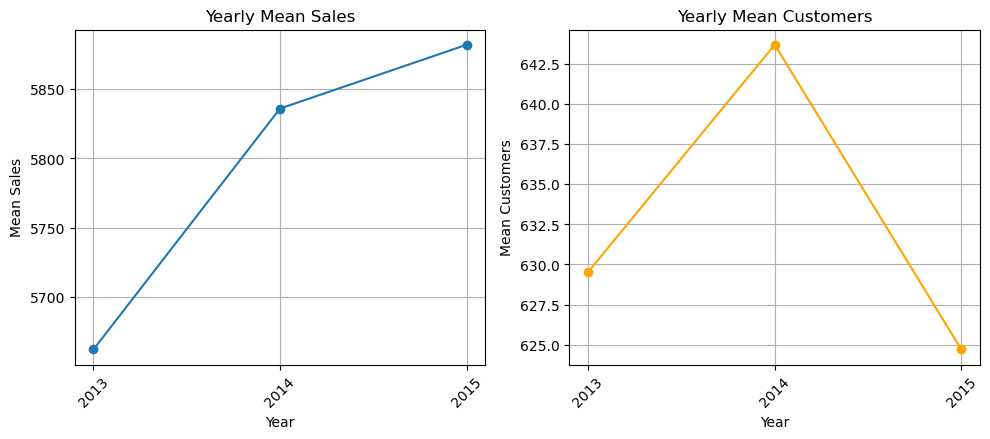

In [71]:
years = [str(year) for year in rossmann_years.index.year.unique()] # Extract years

# Create a line graph for the quarter means
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
plt.plot(rossmann_years['Sales'], marker='o')
plt.title('Yearly Mean Sales')
plt.xlabel('Year')
plt.ylabel('Mean Sales')
plt.xticks(ticks=rossmann_years.index, labels=years, rotation=45) # Set x-ticks as years
plt.tight_layout()
plt.grid()

plt.subplot(2,2,2)
plt.plot(rossmann_years['Customers'], marker='o', color='orange')
plt.title('Yearly Mean Customers')
plt.xlabel('Year')
plt.ylabel('Mean Customers')
plt.xticks(ticks=rossmann_years.index, labels=years, rotation=45) # Set x-ticks as years
plt.tight_layout()
plt.grid()

* The sales of the top 20% have decreased over the years, with a notable drop in 2015. On the other hand, overall sales have been growing.

## Quarterly Sales and Customers

In [72]:
top_20_clean.sort_index(inplace=True)
top_20_quarters = top_20_clean.resample("Q").mean()

rossmann_clean.sort_index(inplace=True)
rossmann_quarters = rossmann_clean.resample("Q").mean()

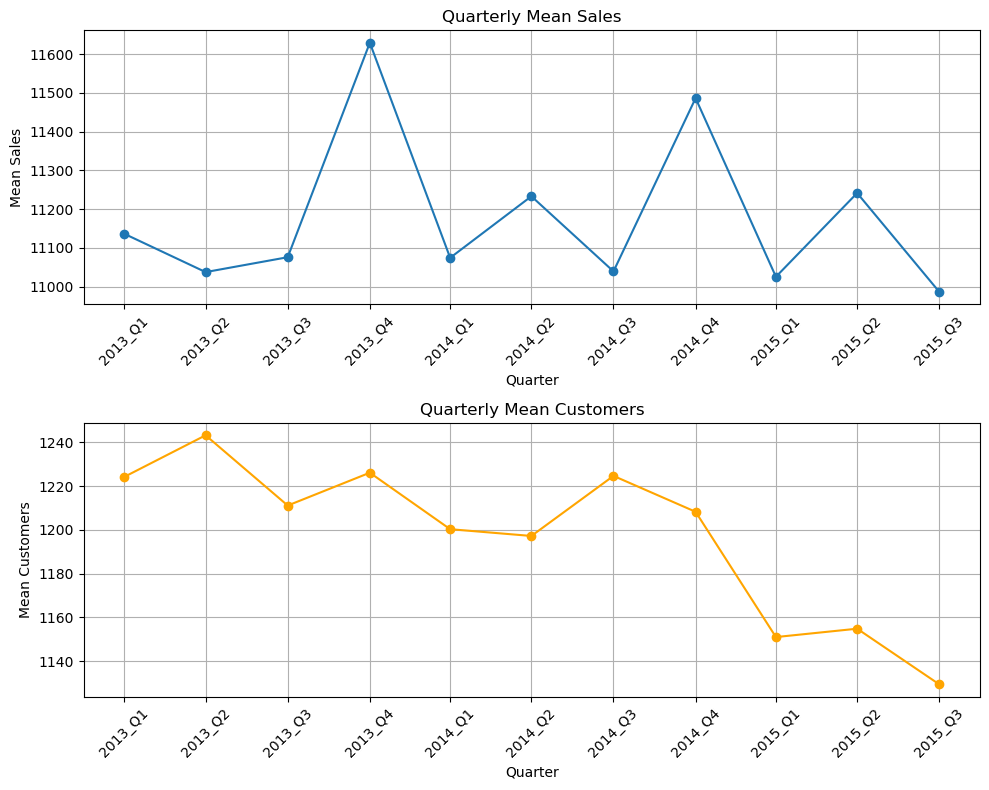

In [73]:
quarter_labels = [f"{date.year}_Q{((date.month - 1) // 3) + 1}" for date in top_20_quarters.index]

# Create a line graph for the quarter means
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.plot(top_20_quarters['Sales'], marker='o')
plt.title('Quarterly Mean Sales')
plt.xlabel('Quarter')
plt.ylabel('Mean Sales')
plt.xticks(ticks=top_20_quarters.index, labels=quarter_labels, rotation=45)
plt.tight_layout()
plt.grid()

plt.subplot(2,1,2)
plt.plot(top_20_quarters['Customers'], marker='o', color='orange')
plt.title('Quarterly Mean Customers')
plt.xlabel('Quarter')
plt.ylabel('Mean Customers')
plt.xticks(ticks=top_20_quarters.index, labels=quarter_labels, rotation=45)
plt.tight_layout()
plt.grid()

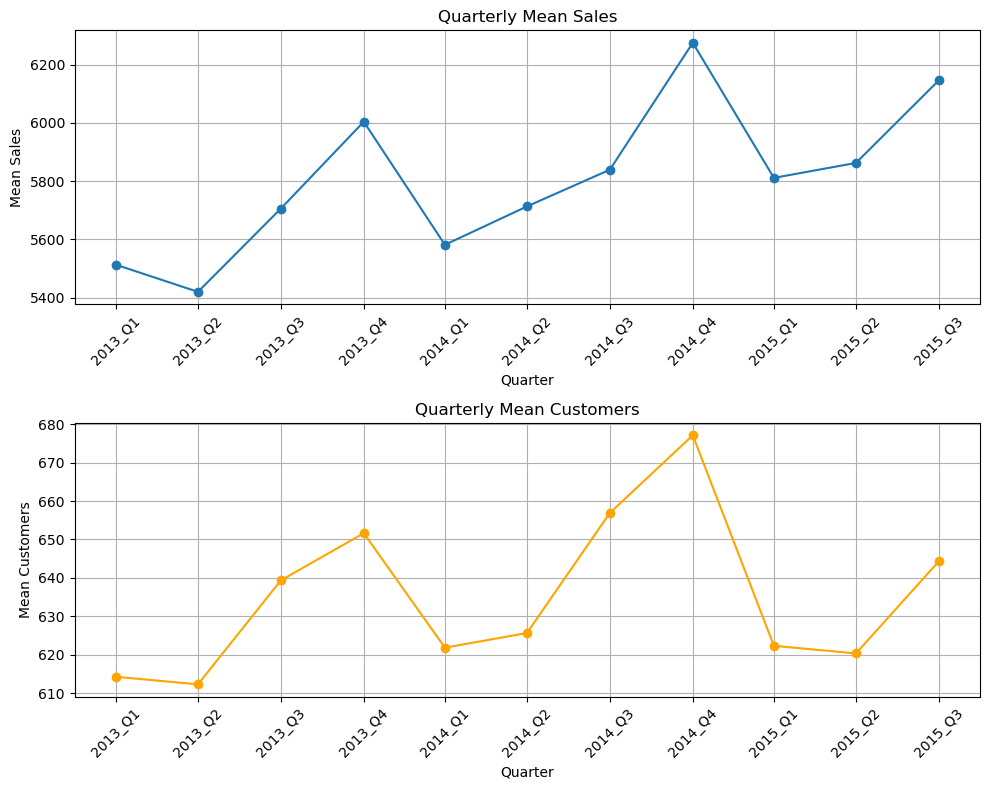

In [74]:
quarter_labels = [f"{date.year}_Q{((date.month - 1) // 3) + 1}" for date in top_20_quarters.index]

# Create a line graph for the quarter means
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.plot(rossmann_quarters['Sales'], marker='o')
plt.title('Quarterly Mean Sales')
plt.xlabel('Quarter')
plt.ylabel('Mean Sales')
plt.xticks(ticks=rossmann_quarters.index, labels=quarter_labels, rotation=45)
plt.tight_layout()
plt.grid()

plt.subplot(2,1,2)
plt.plot(rossmann_quarters['Customers'], marker='o', color='orange')
plt.title('Quarterly Mean Customers')
plt.xlabel('Quarter')
plt.ylabel('Mean Customers')
plt.xticks(ticks=rossmann_quarters.index, labels=quarter_labels, rotation=45)
plt.tight_layout()
plt.grid()

* For both the top 20% and overall sales, the 4th quarter recorded the highest figures. Notably, while the top 20% sales show a consistent decline, the overall sales exhibit a steady increase.

* The significant drop in 2015 for Top 20% sales can be attributed to the fact that the mean sales for 2015 doesn't include Q4. Considering the trends, Q4 could have boosted the mean sales.

## Monthly Sales and Customers

In [47]:
top_20_clean.sort_index(inplace=True)
top_20_months = top_20_clean.resample("1M").mean()

rossmann_clean.sort_index(inplace=True)
rossmann_months = rossmann_clean.resample("1M").mean()

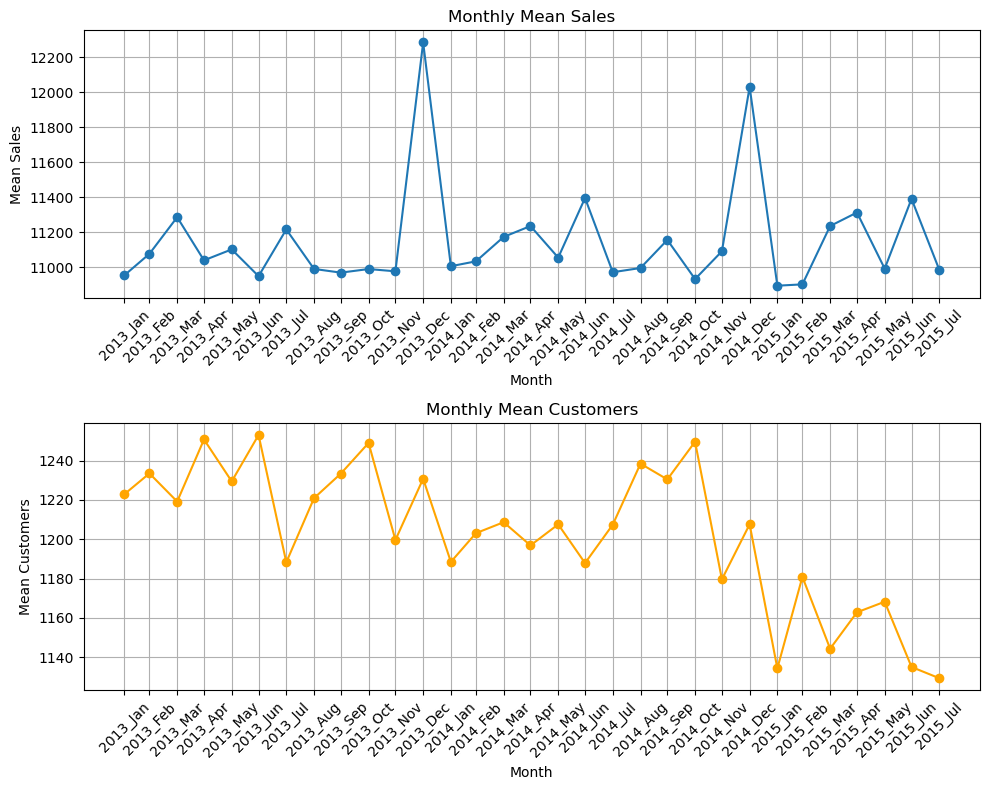

In [76]:
month_labels = [f"{date.year}_{date.strftime('%b')}" for date in top_20_months.index]

# Create a line graph for the quarter means
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.plot(top_20_months['Sales'], marker='o')
plt.title('Monthly Mean Sales')
plt.xlabel('Month')
plt.ylabel('Mean Sales')
plt.xticks(ticks=top_20_months.index,labels=month_labels,rotation=45)
plt.tight_layout()  
plt.grid()

plt.subplot(2,1,2)
plt.plot(top_20_months['Customers'], marker='o', color='orange')
plt.title('Monthly Mean Customers')
plt.xlabel('Month')
plt.ylabel('Mean Customers')
plt.xticks(ticks=top_20_months.index,labels=month_labels,rotation=45)
plt.tight_layout()
plt.grid()

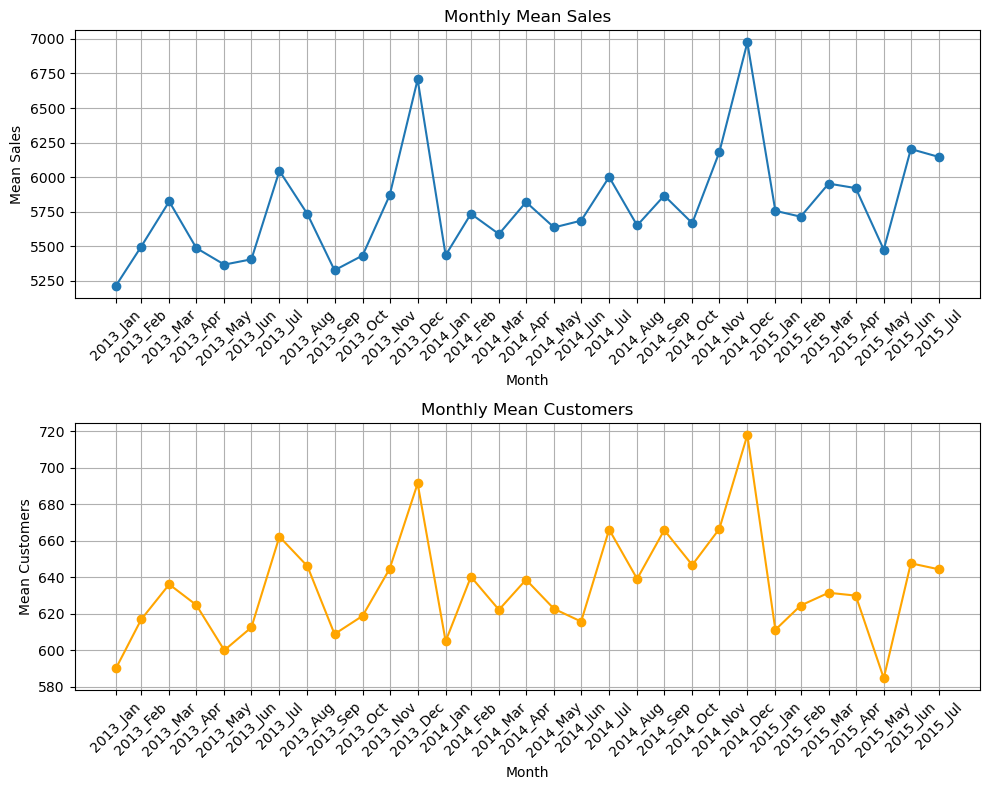

In [77]:
month_labels = [f"{date.year}_{date.strftime('%b')}" for date in rossmann_months.index]

# Create a line graph for the quarter means
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.plot(rossmann_months['Sales'], marker='o')
plt.title('Monthly Mean Sales')
plt.xlabel('Month')
plt.ylabel('Mean Sales')
plt.xticks(ticks=rossmann_months.index,labels=month_labels,rotation=45)
plt.tight_layout()  
plt.grid()

plt.subplot(2,1,2)
plt.plot(rossmann_months['Customers'], marker='o', color='orange')
plt.title('Monthly Mean Customers')
plt.xlabel('Month')
plt.ylabel('Mean Customers')
plt.xticks(ticks=rossmann_months.index,labels=month_labels,rotation=45)
plt.tight_layout()
plt.grid()

* In Q4, sales, especially in December, elevated the average sales for the quarter.

## Weekly Sales and Customers

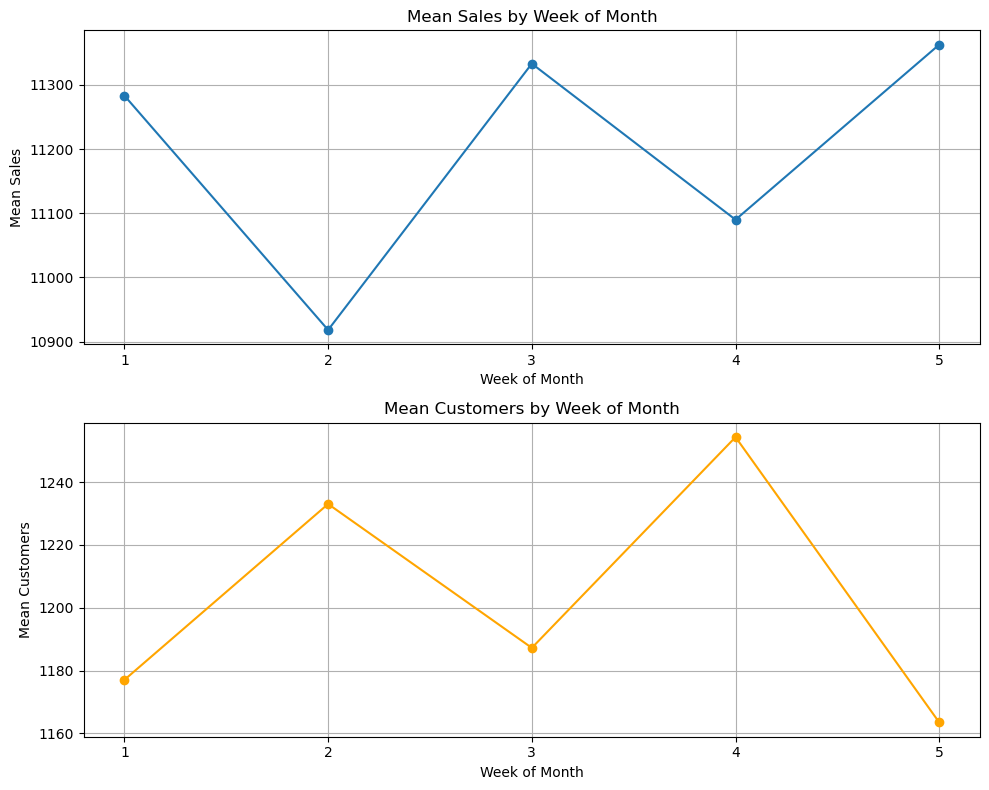

In [78]:
# Assign week of month to each row
top_20_clean['week_of_month'] = top_20_clean.index.day // 7 + 1  # This gives weeks as 1, 2, 3, 4, and 5.
rossmann_clean['week_of_month'] = rossmann_clean.index.day // 7 + 1 


top_20_weekly = top_20_clean.groupby('week_of_month').mean()
rossmann_weekly = rossmann_clean.groupby('week_of_month').mean()

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 8))


ax[0].plot(top_20_weekly['Sales'], marker='o')
ax[0].set_title('Mean Sales by Week of Month')
ax[0].set_xlabel('Week of Month')
ax[0].set_ylabel('Mean Sales')
ax[0].set_xticks([1, 2, 3, 4, 5])  
ax[0].grid(True)


ax[1].plot(top_20_weekly['Customers'], marker='o', color='orange')
ax[1].set_title('Mean Customers by Week of Month')
ax[1].set_xlabel('Week of Month')
ax[1].set_ylabel('Mean Customers')
ax[1].set_xticks([1, 2, 3, 4, 5]) 
ax[1].grid(True)

plt.tight_layout()
plt.show()

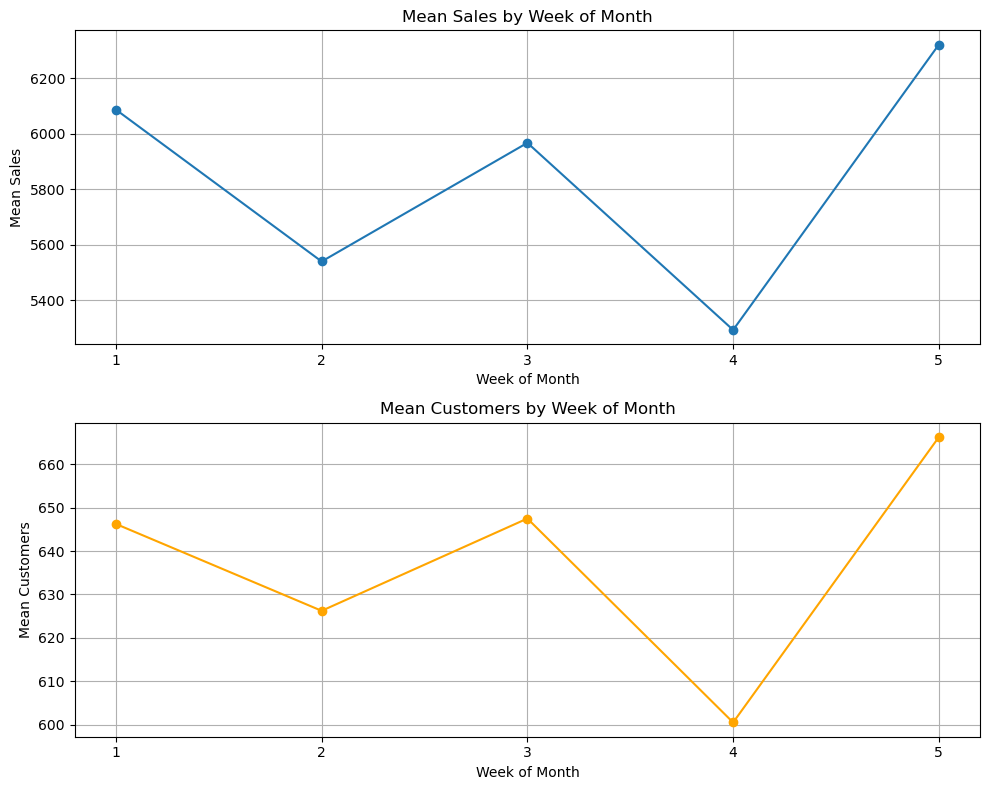

In [79]:
# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 8))


ax[0].plot(rossmann_weekly['Sales'], marker='o')
ax[0].set_title('Mean Sales by Week of Month')
ax[0].set_xlabel('Week of Month')
ax[0].set_ylabel('Mean Sales')
ax[0].set_xticks([1, 2, 3, 4, 5])  
ax[0].grid(True)


ax[1].plot(rossmann_weekly['Customers'], marker='o', color='orange')
ax[1].set_title('Mean Customers by Week of Month')
ax[1].set_xlabel('Week of Month')
ax[1].set_ylabel('Mean Customers')
ax[1].set_xticks([1, 2, 3, 4, 5]) 
ax[1].grid(True)

plt.tight_layout()
plt.show()

## Daily Sales and Customers

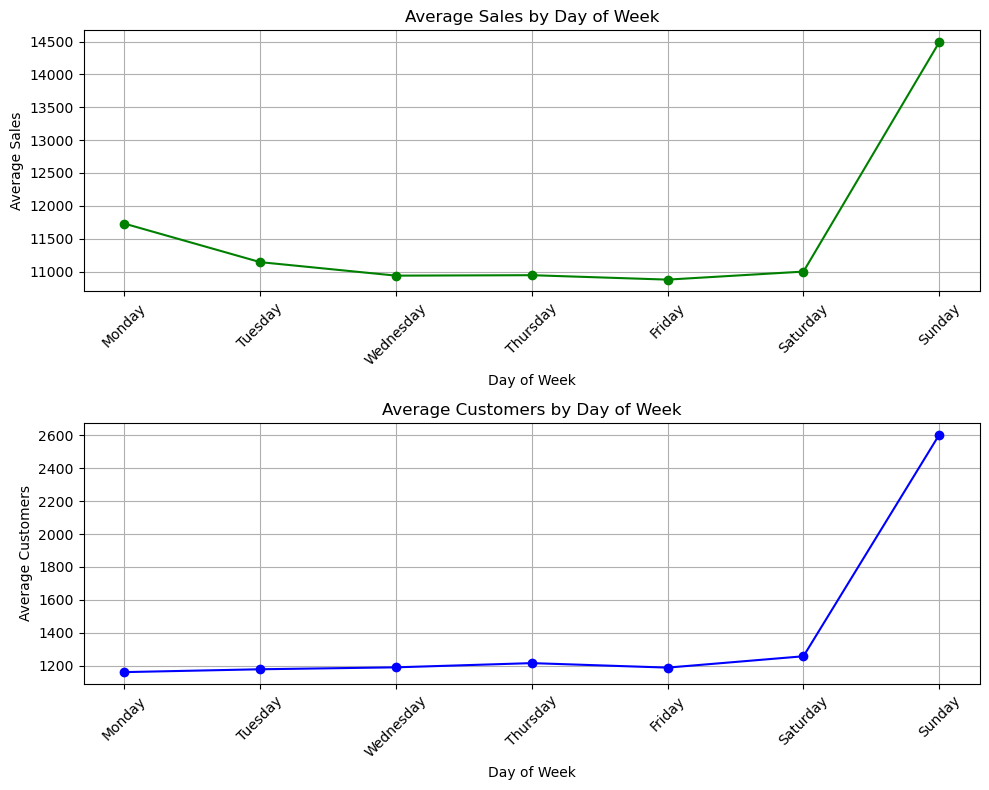

In [80]:
top_20_daily = top_20_clean.groupby('DayOfWeekName')[['Sales', 'Customers']].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(top_20_daily['Sales'], marker='o', color='g')
ax[0].set_title('Average Sales by Day of Week')
ax[0].set_xlabel('Day of Week')
ax[0].set_ylabel('Average Sales')
ax[0].grid(True)
ax[0].set_xticks(list(range(7)))
ax[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)

ax[1].plot(top_20_daily['Customers'], marker='o', color='b')
ax[1].set_title('Average Customers by Day of Week')
ax[1].set_xlabel('Day of Week')
ax[1].set_ylabel('Average Customers')
ax[1].grid(True)
ax[1].set_xticks(list(range(7)))
ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)

plt.tight_layout()
plt.show()

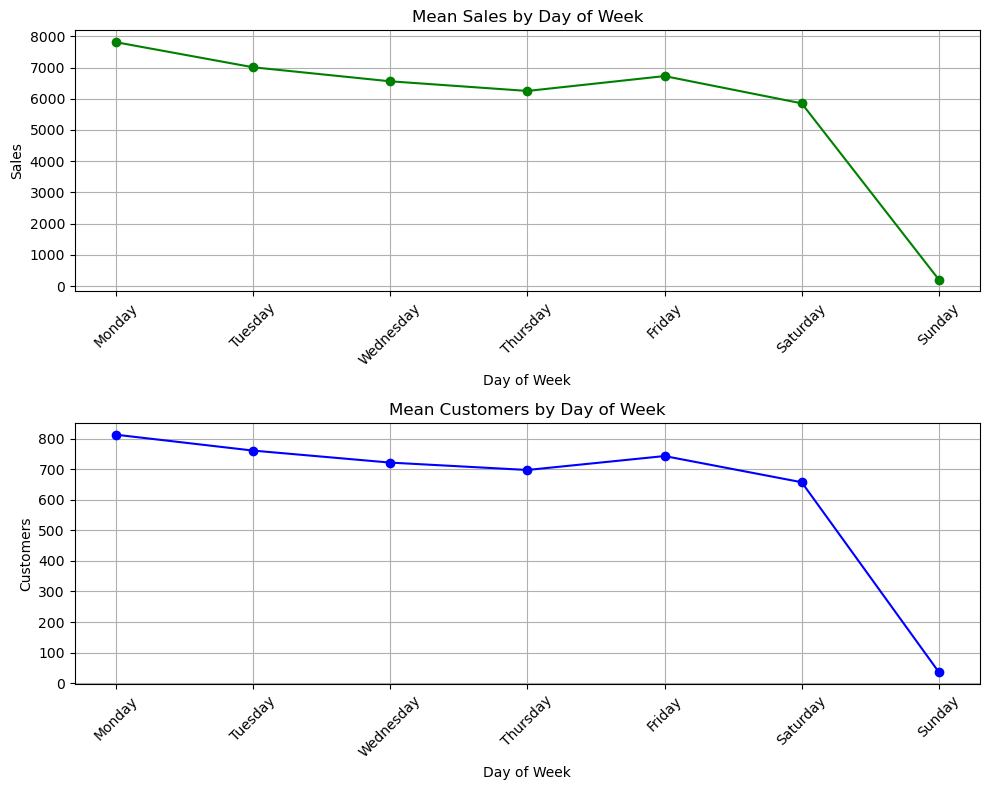

In [81]:
rossmann_daily = rossmann_clean.groupby('DayOfWeekName')[['Sales', 'Customers']].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Sales subplot
ax[0].plot(rossmann_daily['Sales'], marker='o', color='g', label='Total')
ax[0].set_title('Mean Sales by Day of Week')
ax[0].set_xlabel('Day of Week')
ax[0].set_ylabel('Sales')
ax[0].grid(True)
ax[0].set_xticks(list(range(7)))
ax[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)

# Customers subplot
ax[1].plot(rossmann_daily['Customers'], marker='o', color='b', label='Total')
ax[1].set_title('Mean Customers by Day of Week')
ax[1].set_xlabel('Day of Week')
ax[1].set_ylabel('Customers')
ax[1].grid(True)
ax[1].set_xticks(list(range(7)))
ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)

plt.tight_layout()
plt.show()

In [82]:
rossmann_daily[rossmann_daily.index=='Sunday']

,Sales,Customers
DayOfWeekName,,
Sunday,204.715027,35.880031


In [83]:
top_20_clean[top_20_clean['DayOfWeekName']=='Sunday']['Open'].value_counts()

1    1357
Name: Open, dtype: int64

In [84]:
rossmann_clean[rossmann_clean['DayOfWeekName']=='Sunday']['Open'].value_counts()

0    140761
1      3593
Name: Open, dtype: int64

* A key difference in sales between the top 20% of stores and the overall stores lies in their operation on Sundays. Every store in the top 20% is open, but across all stores, only a mere 2% open their doors on Sundays. If we exclude the top 20% from this figure, even fewer stores are open on this day.


* For the top 20% of stores, sales peak on Mondays and gradually decrease until Saturday, then surge again on Sunday. In contrast, for all stores, sales are highest on Mondays, decrease gradually throughout the week, and hit the lowest point on Sundays.

## Promotion2 EDA with Time

In [523]:
top_20_clean[top_20_clean['Promo2']==1]['Store'].unique()

array([   2,    3,   11,   12,   13,   14,   15,   17,   18,   19,   20,
         21,   22,   24,   27,   28,   30,   35,   36,   39,   40,   41,
         42,   43,   46,   47,   51,   52,   54,   56,   58,   59,   61,
         63,   64,   65,   66,   68,   69,   71,   72,   77,   81,   82,
         86,   89,   91,   92,   93,   96,   98,   99,  101,  102,  105,
        111,  114,  115,  120,  121,  126,  127,  128,  129,  130,  132,
        133,  135,  136,  137,  139,  140,  141,  145,  146,  149,  153,
        155,  156,  158,  162,  164,  166,  169,  170,  172,  174,  181,
        182,  188,  190,  191,  192,  194,  196,  198,  199,  201,  204,
        206,  209,  213,  214,  215,  216,  218,  223,  224,  228,  229,
        231,  232,  235,  238,  242,  243,  244,  247,  248,  250,  252,
        253,  255,  256,  258,  261,  265,  266,  271,  272,  274,  275,
        276,  277,  279,  280,  283,  284,  287,  288,  295,  296,  300,
        303,  305,  308,  309,  310,  314,  317,  3

In [524]:
store_421 = top_20_clean[top_20_clean['Store']==421]

In [525]:
store_421['Promo2SinceYear'].unique()

array([2012.])

In [526]:
store_421['Promo2SinceWeek'].unique()

array([35.])

In [527]:
store_421['PromoInterval'].unique()

array(['Mar,Jun,Sept,Dec'], dtype=object)

In [312]:
store_421[store_421['Promo']==1]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeekName,source,week_of_month,assortment_a,assortment_b,assortment_c,storetype_a,storetype_b,storetype_c,storetype_d,stateholiday_0,stateholiday_a,stateholiday_b,stateholiday_c,1,2,3,4,5,6,7,assortment_a,assortment_b,assortment_c,storetype_a,storetype_b,storetype_c,storetype_d,stateholiday_0,stateholiday_a,stateholiday_b,stateholiday_c,1,2,3,4,5,6,7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-07,421,1,10528,1056,1,1,0,0,c,c,3530.0,6.0,2012.0,1,35.0,2012.0,"Mar,Jun,Sept,Dec",Monday,Top 20%,2,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
2013-01-11,421,5,9870,1075,1,1,0,0,c,c,3530.0,6.0,2012.0,1,35.0,2012.0,"Mar,Jun,Sept,Dec",Friday,Top 20%,2,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2013-01-21,421,1,8917,987,1,1,0,0,c,c,3530.0,6.0,2012.0,1,35.0,2012.0,"Mar,Jun,Sept,Dec",Monday,Top 20%,4,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
2013-01-25,421,5,9962,1179,1,1,0,0,c,c,3530.0,6.0,2012.0,1,35.0,2012.0,"Mar,Jun,Sept,Dec",Friday,Top 20%,4,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2013-02-04,421,1,10695,1155,1,1,0,0,c,c,3530.0,6.0,2012.0,1,35.0,2012.0,"Mar,Jun,Sept,Dec",Monday,Top 20%,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
2013-02-05,421,2,9288,996,1,1,0,0,c,c,3530.0,6.0,2012.0,1,35.0,2012.0,"Mar,Jun,Sept,Dec",Tuesday,Top 20%,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2013-02-06,421,3,8758,987,1,1,0,0,c,c,3530.0,6.0,2012.0,1,35.0,2012.0,"Mar,Jun,Sept,Dec",Wednesday,Top 20%,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2013-02-08,421,5,10058,1145,1,1,0,0,c,c,3530.0,6.0,2012.0,1,35.0,2012.0,"Mar,Jun,Sept,Dec",Friday,Top 20%,2,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2013-02-18,421,1,9733,1078,1,1,0,0,c,c,3530.0,6.0,2012.0,1,35.0,2012.0,"Mar,Jun,Sept,Dec",Monday,Top 20%,3,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [432]:
promo_index_421 = store_421[store_421['Promo']==1].index.unique()

In [314]:
promo_index_421.sort_values()[0:100]

DatetimeIndex(['2013-01-07', '2013-01-11', '2013-01-21', '2013-01-25',
               '2013-02-04', '2013-02-05', '2013-02-06', '2013-02-08',
               '2013-02-18', '2013-02-20', '2013-02-22', '2013-03-04',
               '2013-03-05', '2013-03-07', '2013-03-08', '2013-03-19',
               '2013-03-20', '2013-03-21', '2013-03-22', '2013-03-25',
               '2013-03-26', '2013-03-27', '2013-03-28', '2013-04-08',
               '2013-04-09', '2013-04-10', '2013-04-12', '2013-04-22',
               '2013-04-24', '2013-04-25', '2013-04-26', '2013-04-29',
               '2013-04-30', '2013-05-02', '2013-05-03', '2013-05-13',
               '2013-05-14', '2013-05-17', '2013-05-27', '2013-05-29',
               '2013-05-30', '2013-05-31', '2013-06-03', '2013-06-04',
               '2013-06-05', '2013-06-07', '2013-06-17', '2013-06-19',
               '2013-06-21', '2013-07-01', '2013-07-02', '2013-07-03',
               '2013-07-04', '2013-07-05', '2013-07-15', '2013-07-16',
      

In [315]:
promo_index_421.sort_values()[101:200]

DatetimeIndex(['2014-04-01', '2014-04-02', '2014-04-03', '2014-04-04',
               '2014-04-14', '2014-04-15', '2014-04-16', '2014-04-17',
               '2014-04-28', '2014-04-29', '2014-04-30', '2014-05-02',
               '2014-05-05', '2014-05-06', '2014-05-07', '2014-05-08',
               '2014-05-09', '2014-05-19', '2014-05-23', '2014-06-02',
               '2014-06-03', '2014-06-04', '2014-06-05', '2014-06-06',
               '2014-06-16', '2014-06-17', '2014-06-18', '2014-06-20',
               '2014-06-30', '2014-07-01', '2014-07-02', '2014-07-03',
               '2014-07-14', '2014-07-15', '2014-07-16', '2014-07-17',
               '2014-07-18', '2014-07-28', '2014-07-29', '2014-07-30',
               '2014-07-31', '2014-08-01', '2014-08-04', '2014-08-05',
               '2014-08-06', '2014-08-07', '2014-08-08', '2014-08-18',
               '2014-08-19', '2014-08-20', '2014-08-21', '2014-08-22',
               '2014-09-01', '2014-09-03', '2014-09-05', '2014-09-15',
      

In [316]:
promo_index_421.sort_values()[201:254]

DatetimeIndex(['2015-02-02', '2015-02-03', '2015-02-06', '2015-02-16',
               '2015-02-20', '2015-03-02', '2015-03-04', '2015-03-06',
               '2015-03-16', '2015-03-20', '2015-03-30', '2015-03-31',
               '2015-04-01', '2015-04-02', '2015-04-13', '2015-04-14',
               '2015-04-17', '2015-04-27', '2015-04-28', '2015-04-29',
               '2015-04-30', '2015-05-04', '2015-05-05', '2015-05-06',
               '2015-05-07', '2015-05-08', '2015-05-18', '2015-05-20',
               '2015-05-22', '2015-06-01', '2015-06-02', '2015-06-03',
               '2015-06-05', '2015-06-15', '2015-06-16', '2015-06-17',
               '2015-06-18', '2015-06-19', '2015-06-29', '2015-06-30',
               '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-13',
               '2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17',
               '2015-07-27', '2015-07-28', '2015-07-29', '2015-07-30',
               '2015-07-31'],
              dtype='datetime64[ns]', name='Dat

In [332]:
store_2 = top_20_clean[top_20_clean['Store']==2]

In [333]:
store_2['Promo2SinceYear'].unique()

array([2010.])

In [334]:
store_2['Promo2SinceWeek'].unique()

array([13.])

In [335]:
store_2['PromoInterval'].unique()

array(['Jan,Apr,Jul,Oct'], dtype=object)

In [336]:
store_2

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeekName,source,week_of_month,assortment_a,assortment_b,assortment_c,storetype_a,storetype_b,storetype_c,storetype_d,stateholiday_0,stateholiday_a,stateholiday_b,stateholiday_c,1,2,3,4,5,6,7,assortment_a,assortment_b,assortment_c,storetype_a,storetype_b,storetype_c,storetype_d,stateholiday_0,stateholiday_a,stateholiday_b,stateholiday_c,1,2,3,4,5,6,7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-07-15,2,1,8528,804,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Monday,Top 20%,3,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2013-12-02,2,1,8836,850,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Monday,Top 20%,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2013-12-16,2,1,10479,925,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Monday,Top 20%,3,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2013-12-17,2,2,10374,882,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Tuesday,Top 20%,3,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2013-12-18,2,3,10019,1011,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Wednesday,Top 20%,3,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2013-12-19,2,4,8559,823,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Thursday,Top 20%,3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2013-12-23,2,1,8640,971,1,0,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Monday,Top 20%,4,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2014-03-31,2,1,9908,963,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Monday,Top 20%,5,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2014-06-30,2,1,10682,1021,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Monday,Top 20%,5,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [339]:
promo_index_2 = store_2[store_2['Promo']==1].index.unique()

In [340]:
promo_index_2.sort_values()

DatetimeIndex(['2013-07-15', '2013-12-02', '2013-12-16', '2013-12-17',
               '2013-12-18', '2013-12-19', '2014-03-31', '2014-06-30',
               '2014-09-30', '2014-12-01', '2014-12-15', '2014-12-16',
               '2014-12-17', '2015-03-30', '2015-03-31', '2015-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [343]:
top_20_clean[top_20_clean['Promo2']==0]['Store'].unique()

array([ 562,  262,  733,  423,  396,   25,  207,  761,  817,  527,  336,
        467,  921,  513, 1112,  157,  903,  788,  226,  809,  269,  163,
         57, 1075, 1018,  799,    4,  807,  827,  389,  679,  106,  593,
        355,  470,  698,  270,  104,  842,  911,  108,  965,  640,  843,
        125,  755,   33,  963,  432, 1043,  768,  390,  853,  267,  704,
        333,  362,  469,  234,  123,  944,  211, 1089,  233,  938,  546,
       1020,  730,  416,  532,  683,   76, 1101,  523, 1114,  599,  497,
        905,  430,  729,  525,  882,  682,  320,  906,  831,  595,  298,
        358,   84, 1033,  586,  722,  383,  615,  787,  444, 1021,  726,
        144, 1064,  464, 1066,  251,  388,  672,  195,  580,  533,  167,
        709,  626,  411,  178,  189,  482,  468,  458,  445,   37,  484,
         85,  318,  767,  535,  107,  257,    6,   38, 1022,  116,  917,
        863,  260,  529, 1025,  541,  886,  100,  154, 1031,  143,  476,
        475,  448, 1055,  286,  478,  779,  892,  2

In [347]:
store_562 = top_20_clean[top_20_clean['Store']==562]

In [353]:
promo_index_562=store_562[store_562['Promo']==1].index.unique()

In [358]:
promo_index_562.sort_values()[0:100]

DatetimeIndex(['2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-21', '2013-01-22', '2013-01-23',
               '2013-01-24', '2013-01-25', '2013-02-04', '2013-02-05',
               '2013-02-06', '2013-02-07', '2013-02-08', '2013-02-18',
               '2013-02-19', '2013-02-20', '2013-02-21', '2013-02-22',
               '2013-03-04', '2013-03-05', '2013-03-06', '2013-03-07',
               '2013-03-08', '2013-03-18', '2013-03-19', '2013-03-20',
               '2013-03-21', '2013-03-22', '2013-03-25', '2013-03-26',
               '2013-03-27', '2013-03-28', '2013-03-29', '2013-04-08',
               '2013-04-09', '2013-04-10', '2013-04-11', '2013-04-12',
               '2013-04-22', '2013-04-23', '2013-04-24', '2013-04-25',
               '2013-04-26', '2013-04-29', '2013-04-30', '2013-05-01',
               '2013-05-02', '2013-05-03', '2013-05-13', '2013-05-14',
               '2013-05-15', '2013-05-16', '2013-05-17', '2013-05-27',
      

### Upon examining the data for stores participating in consecutive promotions, there seems to be a discrepancy between the "Promo2" and "PromoInterval" columns and their descriptions. This misalignment could compromise data integrity. It's crucial for Rossmann to ensure their data is accurately maintained. Therefore, our team will exclude the columns related to Promo2 when building the prediction model.

## competition open since 

In [ ]:
cosy_2013 = top_20_clean[top_20_clean['CompetitionOpenSinceYear']==2013]
cosy_2014 = top_20_clean[top_20_clean['CompetitionOpenSinceYear']==2014]
cosy_2015 = top_20_clean[top_20_clean['CompetitionOpenSinceYear']==2015]

In [45]:
cosy_2013.sort_index(inplace=True)
cosy_2013_months = cosy_2013.resample("1M").mean()

cosy_2014.sort_index(inplace=True)
cosy_2014_months = cosy_2014.resample("1M").mean()

cosy_2015.sort_index(inplace=True)
cosy_2015_months = cosy_2015.resample("1M").mean()

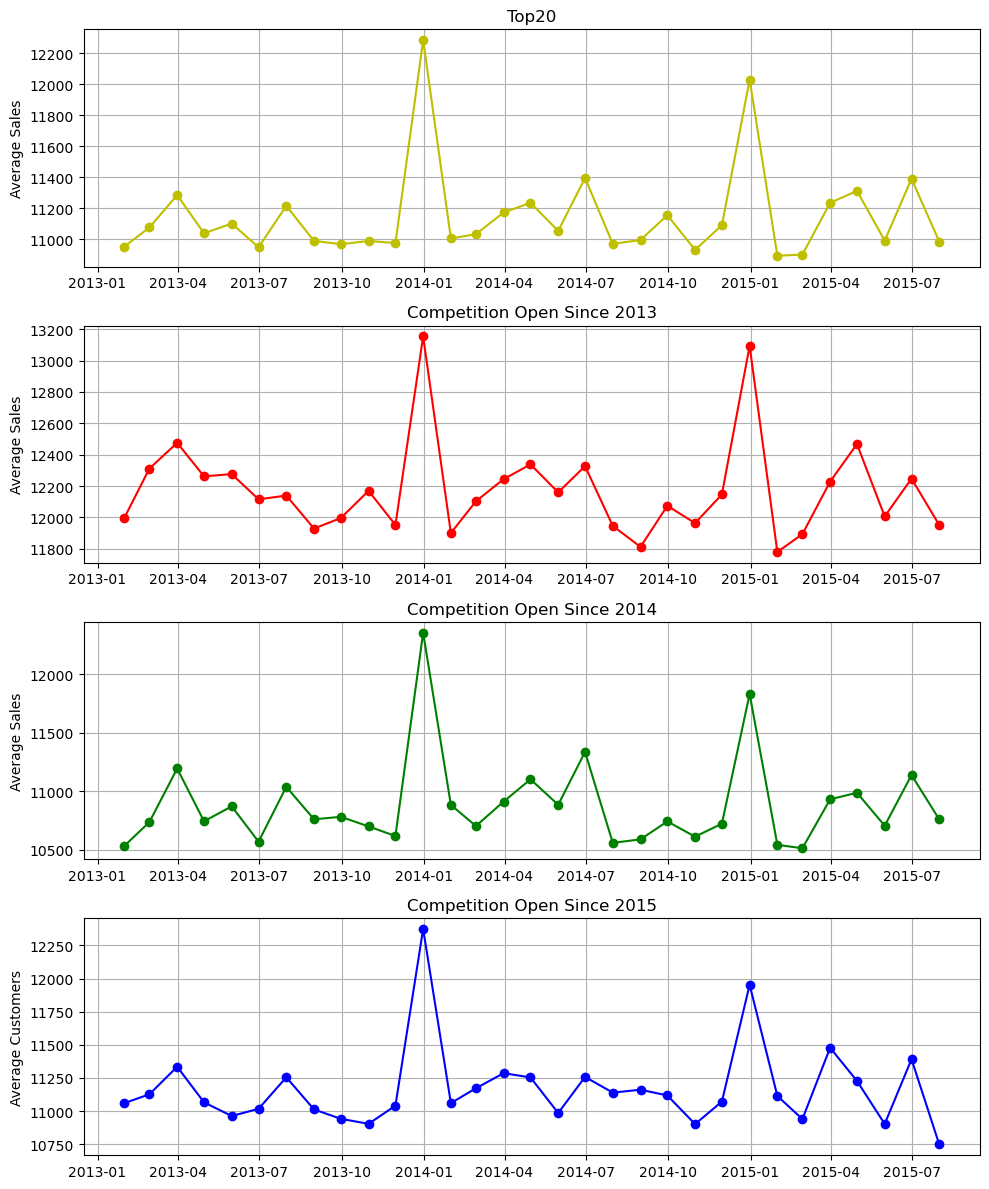

In [48]:
fig, ax = plt.subplots(4, 1, figsize=(10, 12))

ax[0].plot(top_20_months['Sales'], marker='o', color='y')
ax[0].set_title('Top20')
ax[0].set_ylabel('Average Sales')
ax[0].grid(True)


ax[1].plot(cosy_2013_months['Sales'], marker='o', color='r')
ax[1].set_title('Competition Open Since 2013')
ax[1].set_ylabel('Average Sales')
ax[1].grid(True)

ax[2].plot(cosy_2014_months['Sales'], marker='o', color='g')
ax[2].set_title('Competition Open Since 2014')
ax[2].set_ylabel('Average Sales')
ax[2].grid(True)

ax[3].plot(cosy_2015_months['Sales'], marker='o', color='b')
ax[3].set_title('Competition Open Since 2015')
ax[3].set_ylabel('Average Customers')
ax[3].grid(True)

plt.tight_layout()
plt.show()

In [63]:
cosm_01 = top_20_clean[top_20_clean['CompetitionOpenSinceMonth']==1]
cosm_02 = top_20_clean[top_20_clean['CompetitionOpenSinceMonth']==2]
cosm_03 = top_20_clean[top_20_clean['CompetitionOpenSinceMonth']==3]
cosm_04 = top_20_clean[top_20_clean['CompetitionOpenSinceMonth']==4]
cosm_05 = top_20_clean[top_20_clean['CompetitionOpenSinceMonth']==5]
cosm_06 = top_20_clean[top_20_clean['CompetitionOpenSinceMonth']==6]
cosm_07 = top_20_clean[top_20_clean['CompetitionOpenSinceMonth']==7]
cosm_08 = top_20_clean[top_20_clean['CompetitionOpenSinceMonth']==8]
cosm_09 = top_20_clean[top_20_clean['CompetitionOpenSinceMonth']==9]
cosm_10 = top_20_clean[top_20_clean['CompetitionOpenSinceMonth']==10]
cosm_11 = top_20_clean[top_20_clean['CompetitionOpenSinceMonth']==11]
cosm_12 = top_20_clean[top_20_clean['CompetitionOpenSinceMonth']==12]

In [64]:
cosm_01.sort_index(inplace=True)
cosm_01_months = cosm_01.resample("1M").mean()

cosm_02.sort_index(inplace=True)
cosm_02_months = cosm_02.resample("1M").mean()

cosm_03.sort_index(inplace=True)
cosm_03_months = cosm_03.resample("1M").mean()

cosm_04.sort_index(inplace=True)
cosm_04_months = cosm_04.resample("1M").mean()

cosm_05.sort_index(inplace=True)
cosm_05_months = cosm_05.resample("1M").mean()

cosm_06.sort_index(inplace=True)
cosm_06_months = cosm_06.resample("1M").mean()

cosm_07.sort_index(inplace=True)
cosm_07_months = cosm_07.resample("1M").mean()

cosm_08.sort_index(inplace=True)
cosm_08_months = cosm_08.resample("1M").mean()

cosm_09.sort_index(inplace=True)
cosm_09_months = cosm_09.resample("1M").mean()

cosm_10.sort_index(inplace=True)
cosm_10_months = cosm_10.resample("1M").mean()

cosm_11.sort_index(inplace=True)
cosm_11_months = cosm_11.resample("1M").mean()

cosm_12.sort_index(inplace=True)
cosm_12_months = cosm_12.resample("1M").mean()

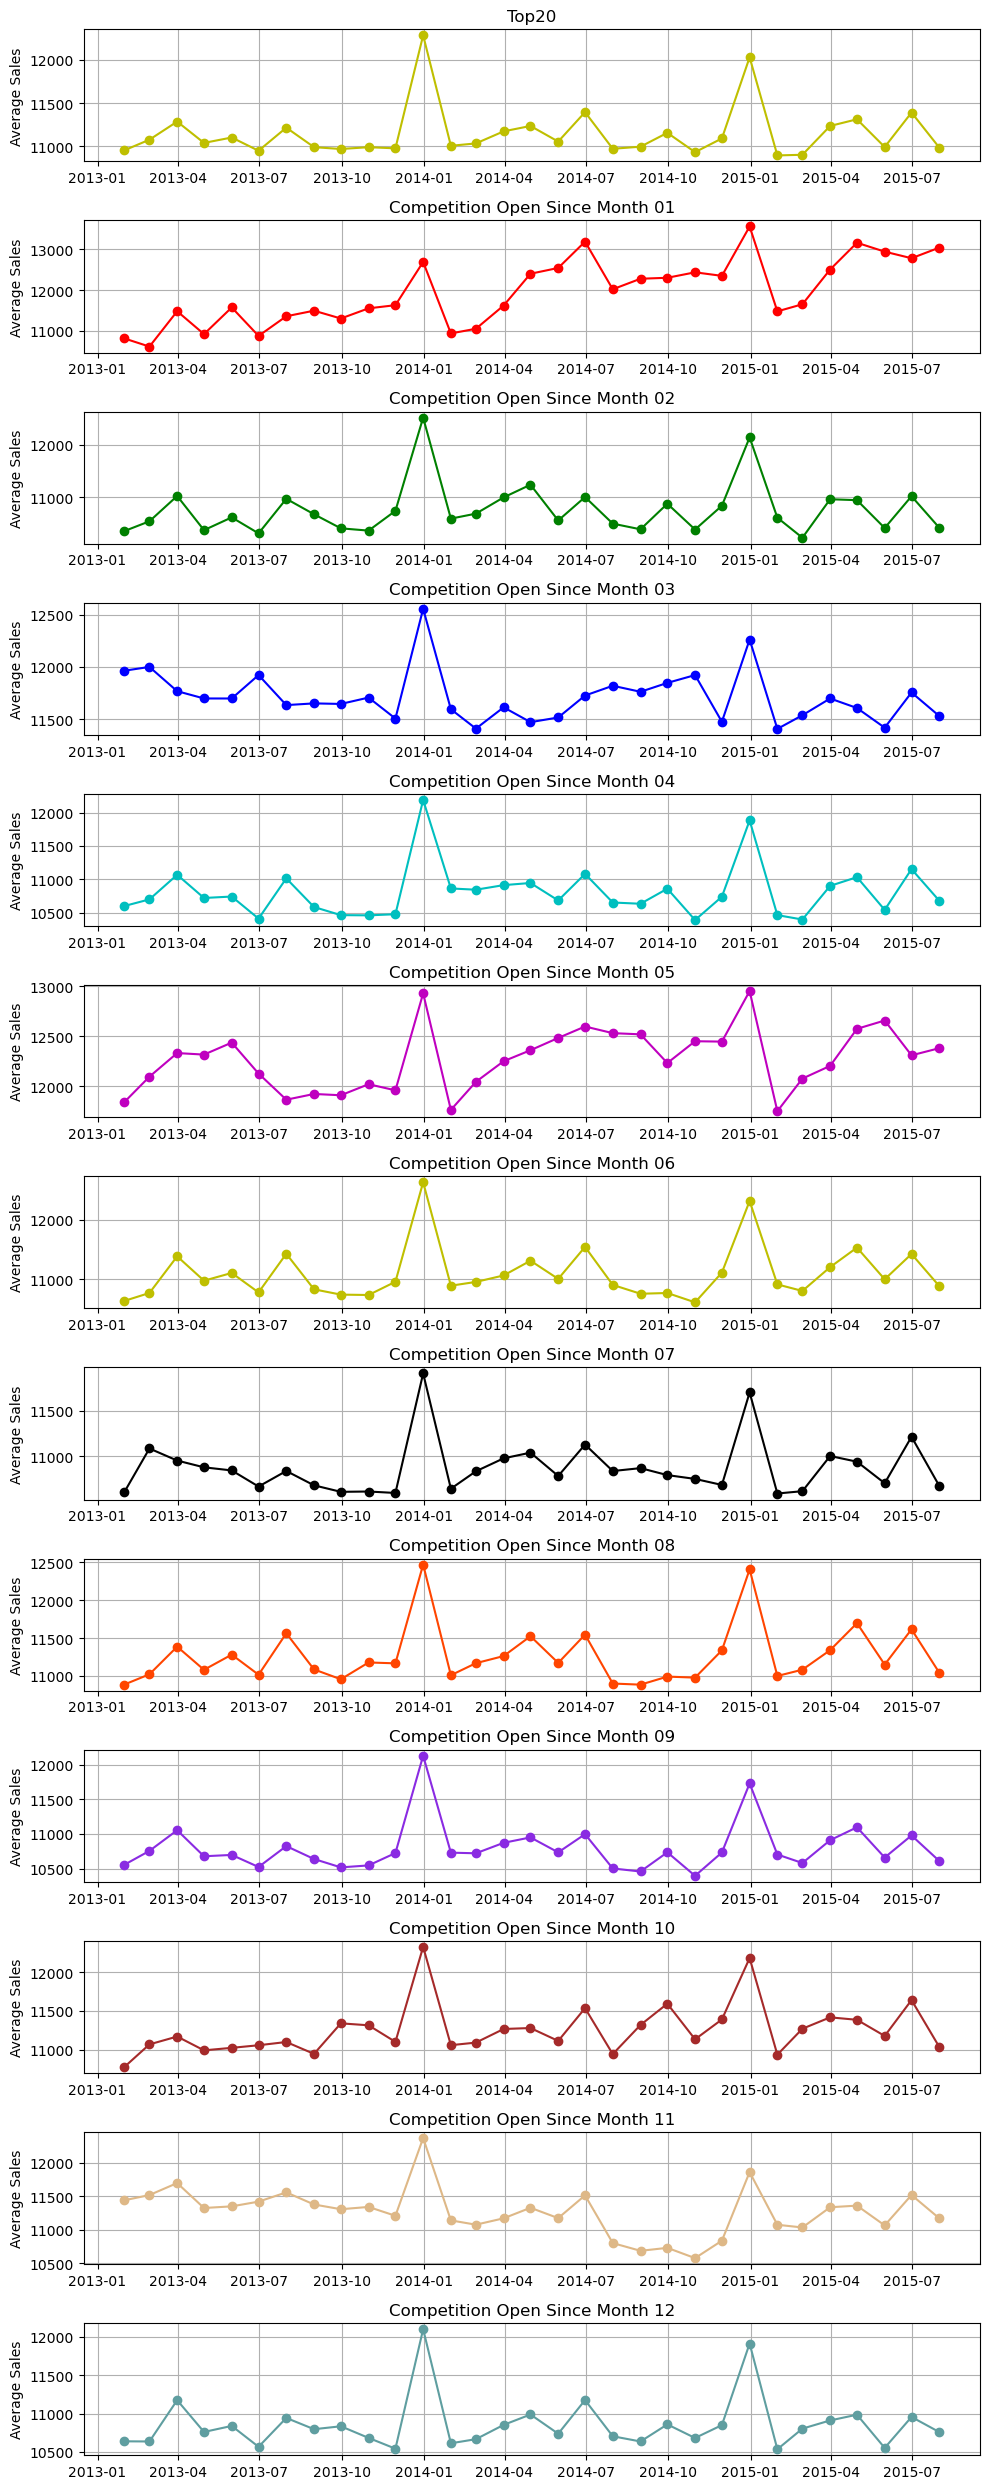

In [73]:
fig, ax = plt.subplots(13, 1, figsize=(10, 25))

cosm_dfs = [cosm_01_months, cosm_02_months, cosm_03_months, cosm_04_months, cosm_05_months, 
            cosm_06_months, cosm_07_months, cosm_08_months, cosm_09_months, cosm_10_months, 
            cosm_11_months, cosm_12_months]

# Colors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', '#FF4500', '#8A2BE2', '#A52A2A', '#DEB887', '#5F9EA0']


ax[0].plot(top_20_months['Sales'], marker='o', color='y')
ax[0].set_title('Top20')
ax[0].set_ylabel('Average Sales')
ax[0].grid(True)

for i, (df, color) in enumerate(zip(cosm_dfs, colors)):
    ax[i+1].plot(df['Sales'], marker='o', color=color)
    ax[i+1].set_title(f'Competition Open Since Month {str(i+1).zfill(2)}')
    ax[i+1].set_ylabel('Average Sales')
    ax[i+1].grid(True)


plt.tight_layout()  
plt.show()

### Initially, we assumed that sales would decrease after a competition opened. However, regardless of "CompetitionOpenSinceYear," all the graphs depict a nearly similar trend. Hence, we can conclude that the opening of a competition does not impact sales. Same applies for 'CompetitionOpenSinceMonth'.

 # Prediction Model

In [388]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, PolynomialFeatures
from sklearn.model_selection import cross_validate, RepeatedKFold, train_test_split, cross_val_score, GridSearchCV

In [395]:
df_model = top_20_clean.copy()

In [396]:
df_model.dtypes

Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
DayOfWeekName                 object
dtype: object

* As mentioned before, we are going to exclude columns that are related to Promotion2 which are 'Promo2', 'Promo2SinceWeek','Promo2SinceYear','PromoInterval'.


* We also exclud 'DayOfWeekName' column because this variable is redundant due to the existence of 'DayOfWeek', and was created for better interpretation.


* Throughout the EDA we have verified that 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' do not affect the sales. So, we drop them as well.


* 'Store' variable is just a unique ID for each store and ofcourse it does not affect sales, if it does it's just a coincidence.

In [397]:
df_model = df_model.drop(['Store','DayOfWeekName','Open','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1)

In [398]:
df_model.dtypes

DayOfWeek                int64
Sales                    int64
Customers                int64
Promo                    int64
StateHoliday            object
SchoolHoliday            int64
StoreType               object
Assortment              object
CompetitionDistance    float64
dtype: object

* The columns 'DayOfWeek', 'StateHoliday', 'StoreType', and 'Assortment' are representing categorical data. We will apply one-hot encoding (using dummy variables) to make them suitable for regression modeling.

In [399]:
# one-hot encoding

dayofweek_dummy = pd.get_dummies(df_model.DayOfWeek, prefix='dayofweek')
df_model = pd.concat([df_model, dayofweek_dummy], axis = 1)


stateholiday_dummy = pd.get_dummies(df_model.StateHoliday, prefix='stateholiday')
df_model = pd.concat([df_model, stateholiday_dummy], axis = 1)


assortment_dummy = pd.get_dummies(df_model.Assortment, prefix='assortment')
df_model = pd.concat([df_model, assortment_dummy], axis = 1)


storetype_dummy = pd.get_dummies(df_model.StoreType, prefix='storetype')
df_model = pd.concat([df_model, storetype_dummy], axis = 1)

In [400]:
X = df_model.drop(['Sales','StoreType','Assortment','StateHoliday'],axis=1) 
Y = df_model['Sales']

In [401]:
X.dtypes

DayOfWeek                int64
Customers                int64
Promo                    int64
SchoolHoliday            int64
CompetitionDistance    float64
dayofweek_1              uint8
dayofweek_2              uint8
dayofweek_3              uint8
dayofweek_4              uint8
dayofweek_5              uint8
dayofweek_6              uint8
dayofweek_7              uint8
stateholiday_0           uint8
stateholiday_a           uint8
stateholiday_b           uint8
stateholiday_c           uint8
assortment_a             uint8
assortment_b             uint8
assortment_c             uint8
storetype_a              uint8
storetype_b              uint8
storetype_c              uint8
storetype_d              uint8
dtype: object

In [467]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25,
    random_state=42)

# Construct and fit the model
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X_train,Y_train);  # Fit the model parameters to the training data.

# Evaluate model performance.
training_predictions = linear.predict(X_train)  # Get model predictions for both.
testing_predictions = linear.predict(X_test)    # training and testing data.

# Create a table of the various scores.
pd.DataFrame({
    "R^2": {
        "train": r2_score(Y_train, training_predictions),
        "test": r2_score(Y_test, testing_predictions)
    },
    "RMSE": {
        "train": mean_squared_error(Y_train, training_predictions, squared=False),
        "test": mean_squared_error(Y_test, testing_predictions, squared=False),
    },
    "MAE": {
        "train": mean_absolute_error(Y_train, training_predictions),
        "test": mean_absolute_error(Y_test, testing_predictions),
    },
})

,R^2,RMSE,MAE
train,0.701152,1593.485215,1165.054337
test,0.697966,1589.977285,1164.860660


In [466]:
nX=MaxAbsScaler().fit_transform(X)

# create an array of 21 alpha values logarithmically distributed between 10**(-2) and 10**2
alfas = np.logspace(-2, 2, num=21) 

X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y,
    test_size=0.25,
    random_state=1235
) 

ridgecv = RidgeCV(alfas)

# Fit the Ridge regression model with cross-validation to the training data
ridgecv.fit(X_train,Y_train)


training_predictions = ridgecv.predict(X_train)
testing_predictions = ridgecv.predict(X_test) 

# Retrieve the optimal regularization parameter (alpha) for Ridge regression
ridge_opt_alpha = ridgecv.alpha_

pd.DataFrame({
    "R^2": {
        "train": r2_score(Y_train,training_predictions),
        "test": r2_score(Y_test, testing_predictions)
    },
    "RMSE": {
        "train": mean_squared_error(Y_train, training_predictions, squared=False),
        "test": mean_squared_error(Y_test, testing_predictions, squared=False),
    },
    "MAE": {
        "train": mean_absolute_error(Y_train, training_predictions),
        "test": mean_absolute_error(Y_test, testing_predictions),
    },
})

,R^2,RMSE,MAE
train,0.700837,1590.787944,1163.754176
test,0.698915,1598.153172,1168.128118


In [465]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25,random_state=42)

DTR = DecisionTreeRegressor(random_state=42)
DTR.fit(X_train, Y_train)
Y_pred_DTR = DTR.predict(X_test)

pd.DataFrame({
    "R^2": {
        "train": r2_score(Y_train, DTR.predict(X_train)),
        "test": r2_score(Y_test, Y_pred_DTR)
    },
    "RMSE": {
        "train": mean_squared_error(Y_train, DTR.predict(X_train), squared=False),
        "test": mean_squared_error(Y_test, Y_pred_DTR, squared=False),
    },
    "MAE": {
        "train": mean_absolute_error(Y_train, DTR.predict(X_train)),
        "test": mean_absolute_error(Y_test, Y_pred_DTR),
    },
})

,R^2,RMSE,MAE
train,0.997819,136.137400,30.537587
test,0.831858,1186.318705,778.159328


In [452]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25,random_state=42)

RFR = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Random Forest model to the training data
RFR.fit(X_train, Y_train)  

# Make predictions using the Random Forest model
Y_pred_RFR = RFR.predict(X_test)

pd.DataFrame({
    "R^2": {
        "train": r2_score(Y_train, RFR.predict(X_train)),
        "test": r2_score(Y_test, Y_pred_RFR)
    },
    "RMSE": {
        "train": mean_squared_error(Y_train, RFR.predict(X_train), squared=False),
        "test": mean_squared_error(Y_test, Y_pred_RFR, squared=False),
    },
    "MAE": {
        "train": mean_absolute_error(Y_train, RFR.predict(X_train)),
        "test": mean_absolute_error(Y_test, Y_pred_RFR),
    },
})

,R^2,RMSE,MAE
train,0.985000,356.997382,240.293658
test,0.901841,906.417534,616.523924


In [453]:
Test_Features = X_test[(X_test.index >= '2015-01-01') & (X_test.index <= '2015-01-31')]
Actual_Sales = Y_test[(Y_test.index >= '2015-01-01') & (Y_test.index <= '2015-01-31')]

Pred_Sales = RFR.predict(Test_Features)

In [454]:
Pred_Sales_df = pd.DataFrame(Pred_Sales, columns=['Sales'], index=Test_Features.index)
Actual_Sales_df = pd.DataFrame(Actual_Sales, columns=['Sales'])

In [455]:
Pred_Sales_df

,Sales
Date,
2015-01-23,11189.450000
2015-01-31,11382.140000
2015-01-28,8924.340000
2015-01-08,8890.735333
2015-01-27,9735.730000
...,...
2015-01-05,10223.190000
2015-01-07,9769.830833
2015-01-30,10162.460000


In [456]:
Actual_Sales_df

,Sales
Date,
2015-01-23,11364
2015-01-31,11464
2015-01-28,8571
2015-01-08,8561
2015-01-27,9811
...,...
2015-01-05,10347
2015-01-07,9983
2015-01-30,9932


In [457]:
relative_error = ((Pred_Sales_df['Sales'] - Actual_Sales_df['Sales']) / Actual_Sales_df['Sales'])*100

In [458]:
relative_error.describe()

count    1662.000000
mean        0.069427
std         6.700603
min       -34.973787
25%        -3.842458
50%         0.056656
75%         3.611829
max        60.178789
Name: Sales, dtype: float64

In [459]:
relative_error_df = relative_error.to_frame(name='Relative_Error')

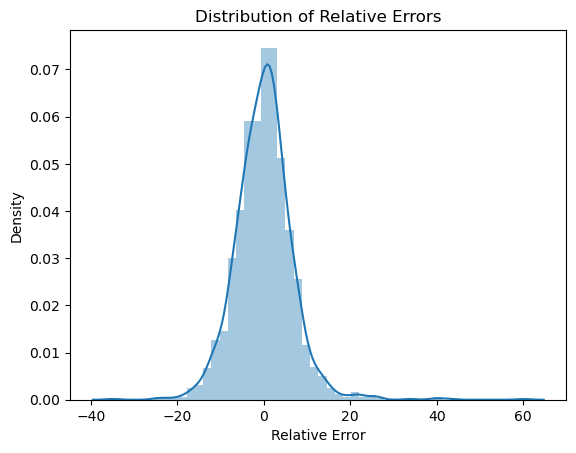

In [460]:
sns.distplot(relative_error, hist=True, kde=True)
plt.xlabel('Relative Error')
plt.title('Distribution of Relative Errors')
plt.show()

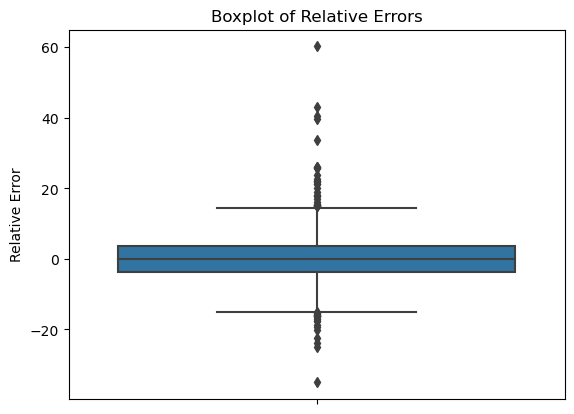

In [461]:
sns.boxplot(y=relative_error)
plt.ylabel('Relative Error')
plt.title('Boxplot of Relative Errors')
plt.show()

In [462]:
Pred_Sales_df_sorted = Pred_Sales_df.sort_index()
Actual_Sales_df_sorted = Actual_Sales_df.sort_index()

In [463]:
Pred_Sales_df_sorted = Pred_Sales_df_sorted.resample("1D").mean()
Actual_Sales_df_sorted = Actual_Sales_df_sorted.resample("1D").mean()

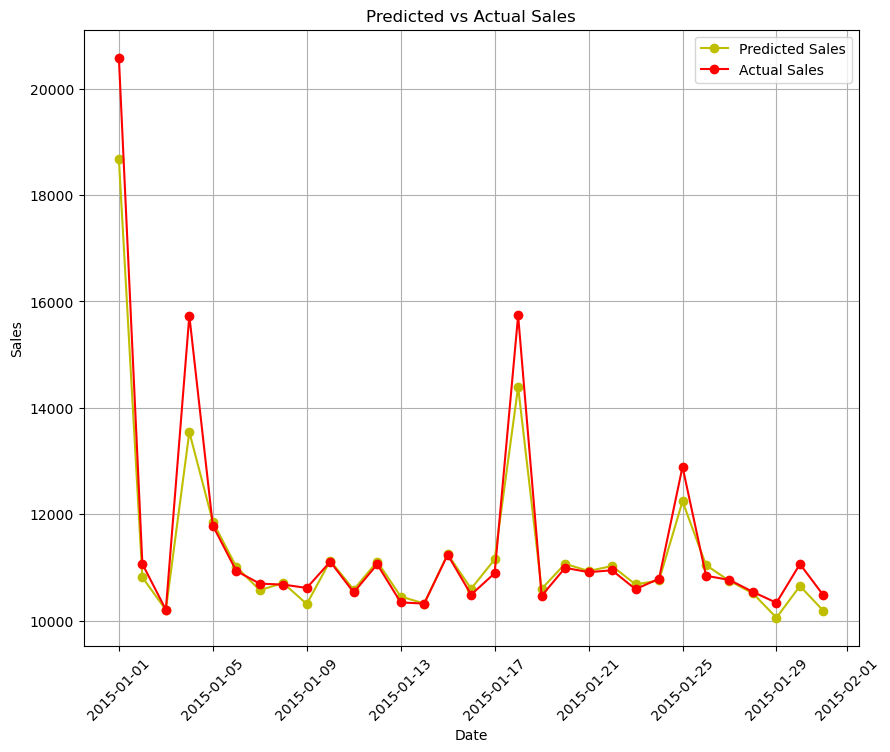

In [464]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting Predicted Sales
ax.plot(Pred_Sales_df_sorted.index, Pred_Sales_df_sorted['Sales'], marker='o', color='y', label='Predicted Sales')

# Plotting Actual Sales
ax.plot(Actual_Sales_df_sorted.index, Actual_Sales_df_sorted['Sales'], marker='o', color='r', label='Actual Sales')

# Setting title, labels, and legend
plt.title('Predicted vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()